In [1170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [1171]:
pd.set_option('display.max_columns', None)

df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1172]:
#let's check the shape of the data frame

df.shape

(9240, 37)

In [1173]:
#let's check the info() method and the datatype of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1174]:
#let's check the null values percentage

round(df.isnull().sum() * 100/ 9240,3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   15.563
How did you hear about X Education               23.885
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

#### We clearly see that we have more than 30% of missing data in some of the columns

In [1175]:
#let's check the 'select' value in the columns, which can be considered as a null value.
cols = list(df.columns)
selectList = [round(len(df[df[i] == 'Select'][i])/9240,2) for i in cols]

[(cols[i], selectList[i])for i in range(0,len(selectList)-1) if (selectList[i] > 0)]

[('Specialization', 0.21),
 ('How did you hear about X Education', 0.55),
 ('Lead Profile', 0.45),
 ('City', 0.24)]

In [1176]:
# lets drop these 4 cols Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score                      45.649
# Asymmetrique Profile Score 

df.drop(labels=['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1, inplace=True)

In [1177]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<AxesSubplot:>

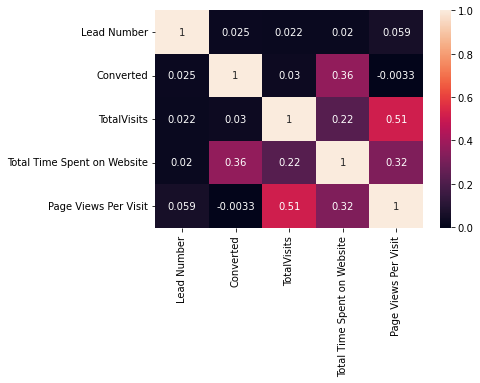

In [1178]:
sns.heatmap(df.corr(), annot=True)

In [1179]:
df.City.unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [1180]:
df.Country.unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [1181]:
# we can drop City as 15% of the value is na and 24% is Select which is also a null type here, and there are not much unique value when compared to Country.

df.drop(labels='City', inplace=True, axis=1)

In [1182]:
df.shape

(9240, 32)

In [1183]:
df.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [1184]:
# 95% of the values are from India, hence we shall be replacing the null values with India

df.Country.fillna(value="India", inplace=True)

In [1185]:
df.Country.isnull().sum()

0

In [1186]:
df['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [1187]:
# almost 75% of the data is null (NaN and Select), hence we can drop this

df.drop(labels='Lead Profile', axis=1, inplace=True)

In [1188]:
df.shape

(9240, 31)

In [1189]:
df['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [1190]:
df['Lead Quality'].value_counts(normalize=True)

Might be             0.348759
Not Sure             0.244131
High in Relevance    0.142410
Worst                0.134362
Low in Relevance     0.130338
Name: Lead Quality, dtype: float64

In [1191]:
# we can drop Lead Quality as it's 51% of the data is missing

df.drop(labels="Lead Quality", axis=1, inplace=True)

In [1192]:
df.shape

(9240, 30)

In [1193]:
df.Tags.unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [1194]:
df.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [1195]:
# 35% of the tags are marked as 'Will revert after reading the email', hence we shall be marking this tag for missing data

df.Tags.fillna(value='Will revert after reading the email', inplace=True)

In [1196]:
df.Tags.isnull().sum()

0

In [1197]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [1198]:
df['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [1199]:
df['Lead Source'].mode()

0    Google
Name: Lead Source, dtype: object

In [1200]:
# we can replace the missing values with Google for Lead source

df['Lead Source'].fillna(value='Google', inplace=True)

In [1201]:
df['Lead Source'].isnull().sum()

0

In [1202]:
df['TotalVisits'].median()

3.0

In [1203]:
df.TotalVisits.fillna(value=3.0, inplace=True)

In [1204]:
df['Page Views Per Visit'].median()

2.0

In [1205]:
df['Page Views Per Visit'].fillna(value=2.0, inplace=True)

In [1206]:
df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [1207]:
df['Last Activity'].mode()

0    Email Opened
Name: Last Activity, dtype: object

In [1208]:
df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [1209]:

df['Last Activity'].fillna(value='Email Opened', inplace=True)

In [1210]:
df.Specialization.unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [1211]:
df.Specialization.mode()

0    Select
Name: Specialization, dtype: object

In [1212]:
# 21 % of the values are Select, which is a type of null value
df.Specialization.value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [1213]:
# there is not dominant specialization to replace it with and there is almost 36% of the values are null,
# we have to drop this.

df.drop(labels='Specialization', axis=1, inplace=True)

In [1214]:
df.shape

(9240, 29)

In [1215]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1216]:
df['How did you hear about X Education'].value_counts(normalize=True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

In [1217]:
# more than 70% of the values are missing, lets drop this columns

df.drop(labels='How did you hear about X Education', axis=1, inplace=True)

In [1218]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [1219]:
df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [1220]:
df.shape

(9240, 28)

In [1221]:
df['What is your current occupation'].fillna(value='Unemployed', inplace=True)

In [1222]:
df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [1223]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1224]:
df.drop(labels='What matters most to you in choosing a course',axis=1, inplace=True)

In [1225]:
df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

In [1226]:
df.dtypes

Prospect ID                                  object
Lead Number                                   int64
Lead Origin                                  object
Lead Source                                  object
Do Not Email                                 object
Do Not Call                                  object
Converted                                     int64
TotalVisits                                 float64
Total Time Spent on Website                   int64
Page Views Per Visit                        float64
Last Activity                                object
Country                                      object
What is your current occupation              object
Search                                       object
Magazine                                     object
Newspaper Article                            object
X Education Forums                           object
Newspaper                                    object
Digital Advertisement                        object
Through Reco

In [1227]:
#[(i, df[i].unique(), type(df[i])) for i in cols]

def getColDetails ():
    unique_cols = [df[i].unique() for i in df.columns]
    length = [df[i].unique().size for i in df.columns]
    dataType = [df[i].dtype for i in df.columns]
    value_count_for2 = [round(df[i].value_counts()*100/9240,3) for i in df.columns]
    u_df = pd.DataFrame({"cols":df.columns, "unique":unique_cols, "dataType": dataType,"length": length, "value_count_for2": value_count_for2})
    return u_df
u_df = getColDetails()
u_df

,cols,unique,dataType,length,value_count_for2
0,Prospect ID,"[7927b2df-8bba-4d29-b9a2-b6e0beafe620, 2a27243...",object,9240,7927b2df-8bba-4d29-b9a2-b6e0beafe620 0.011 ...
1,Lead Number,"[660737, 660728, 660727, 660719, 660681, 66068...",int64,9240,660737 0.011 603303 0.011 602561 0.01...
2,Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",object,5,Landing Page Submission 52.879 API ...
3,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",object,21,Google 31.429 Direct Traffic ...
4,Do Not Email,"[No, Yes]",object,2,No 92.056 Yes 7.944 Name: Do Not Email...
5,Do Not Call,"[No, Yes]",object,2,"No 99.978 Yes 0.022 Name: Do Not Call,..."
6,Converted,"[0, 1]",int64,2,"0 61.461 1 38.539 Name: Converted, dtype..."
7,TotalVisits,"[0.0, 5.0, 2.0, 1.0, 4.0, 8.0, 11.0, 6.0, 3.0,...",float64,41,0.0 23.690 2.0 18.182 3.0 15.61...
8,Total Time Spent on Website,"[0, 674, 1532, 305, 1428, 1640, 71, 58, 1351, ...",int64,1731,0 23.734 60 0.206 74 0.195 7...
9,Page Views Per Visit,"[0.0, 2.5, 2.0, 1.0, 4.0, 8.0, 2.67, 11.0, 5.0...",float64,114,0.00 23.690 2.00 20.909 3.00 12.944 4...


#### all the data types are proper

In [1228]:
# we don't need Prospect ID, Lead Number as they are unique identification nubmers. 
# And Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content
# Get updates on DM Content, I agree to pay the amount through cheque all these have single value NO and these will be 
# No useful for us

df.drop(labels=['Prospect ID', 'Lead Number', 'Magazine', 'Receive More Updates About Our Courses',
               'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque', 'Through Recommendations', 'Digital Advertisement',
               'Newspaper', 'X Education Forums', 'Newspaper Article', 'Search', 'Do Not Call'], axis=1, inplace=True)

df.shape

(9240, 13)

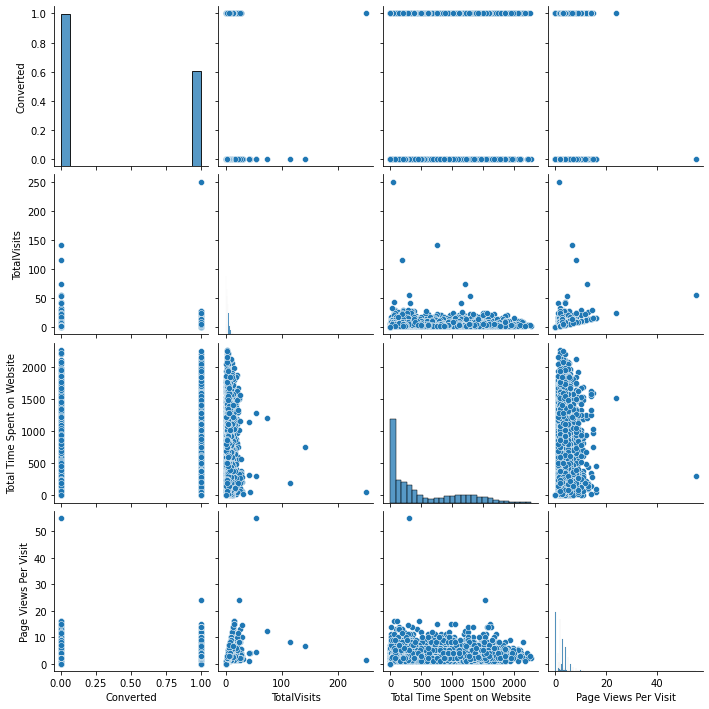

In [1229]:
sns.pairplot(data=df)
plt.show()

In [1230]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

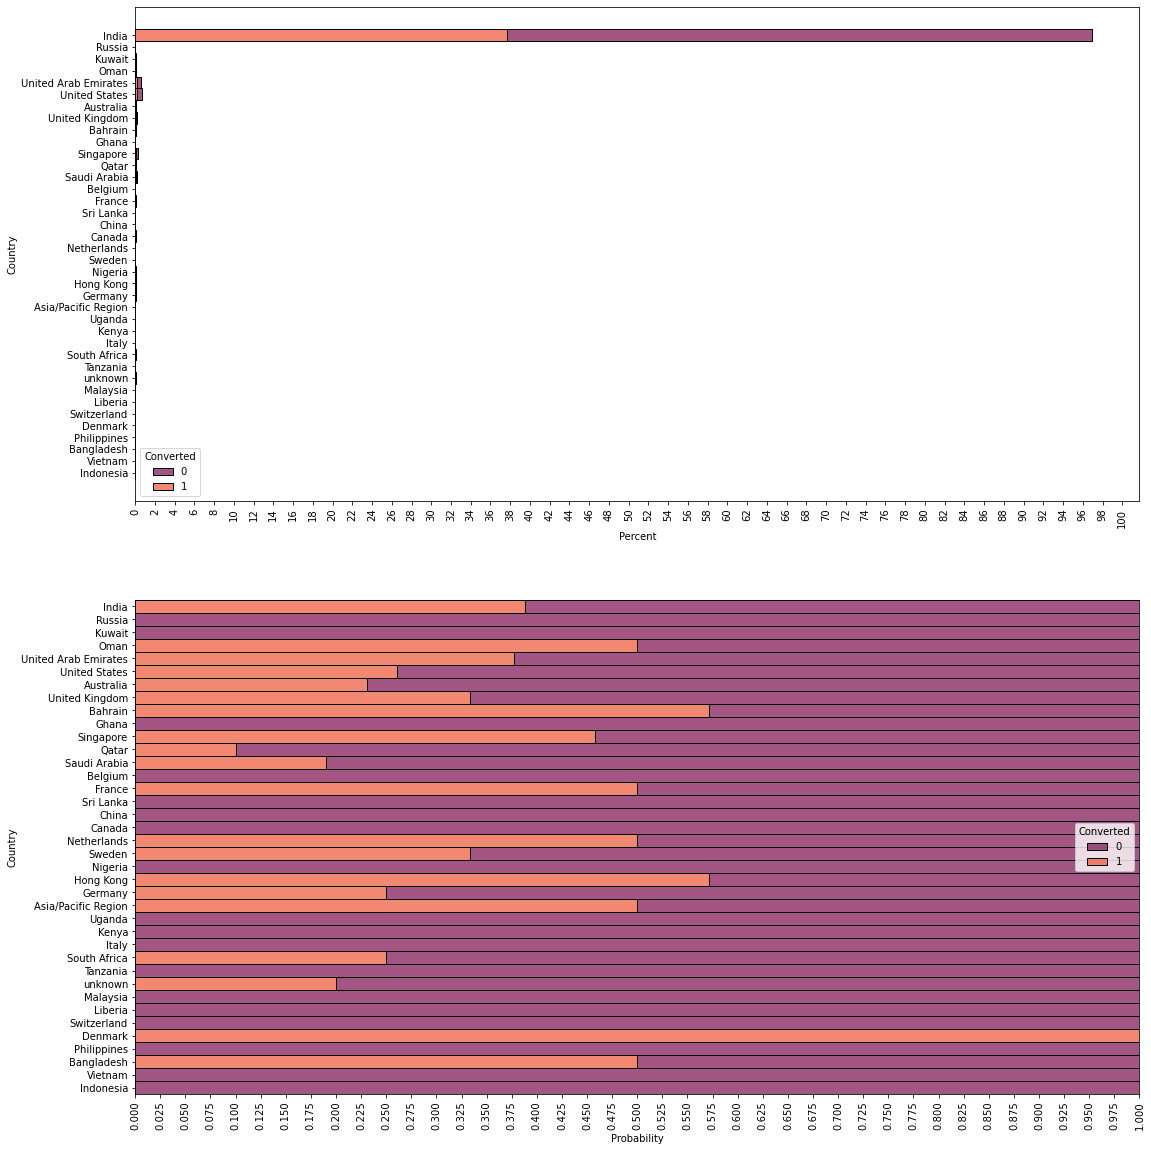

In [1231]:
plt.figure(figsize=[18,20])
plt.subplot(2,1,1)
sns.histplot( data=df, y='Country', hue="Converted",multiple='stack', element='bars',
             palette="rocket", stat='percent')
plt.xticks(range(0,101,2), rotation=90)

plt.subplot(2,1,2)
sns.histplot( data=df, y='Country', hue="Converted",multiple='fill', element='bars',
             palette="rocket", stat='probability')
plt.xticks(np.arange(0.0,1.025,0.025), rotation=90)

plt.show()

#### Inference

- 96% percent of the Leads are from the India.
- only 37.5% of the Leads from India are converted.

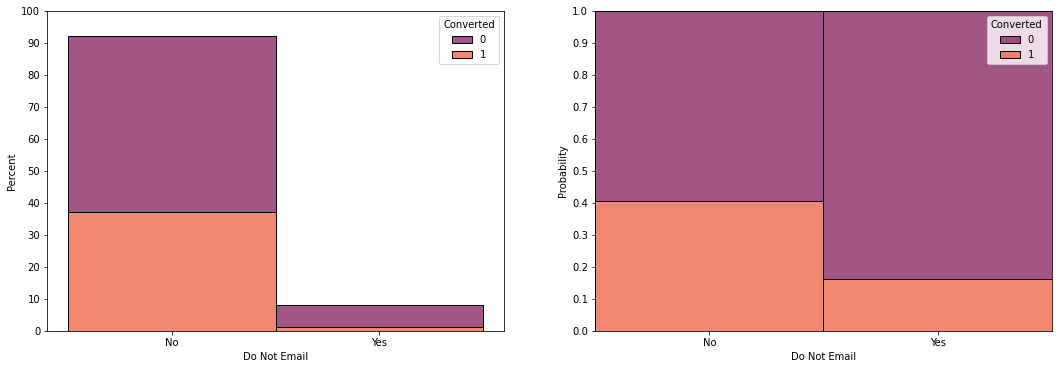

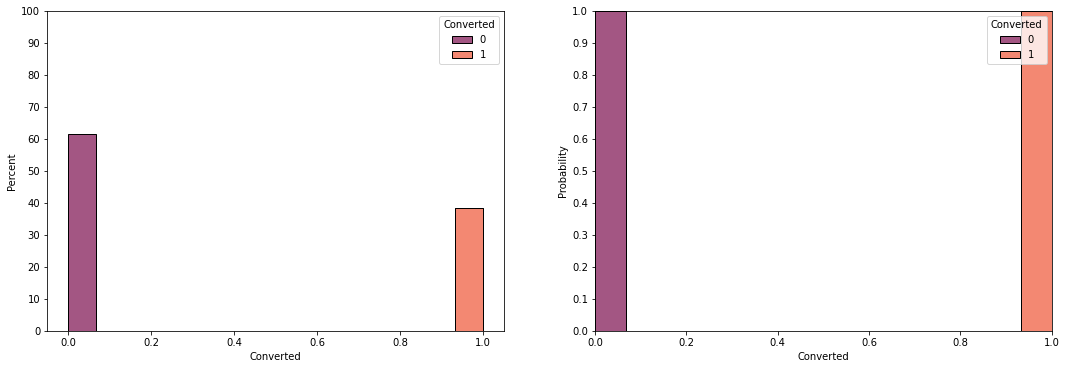

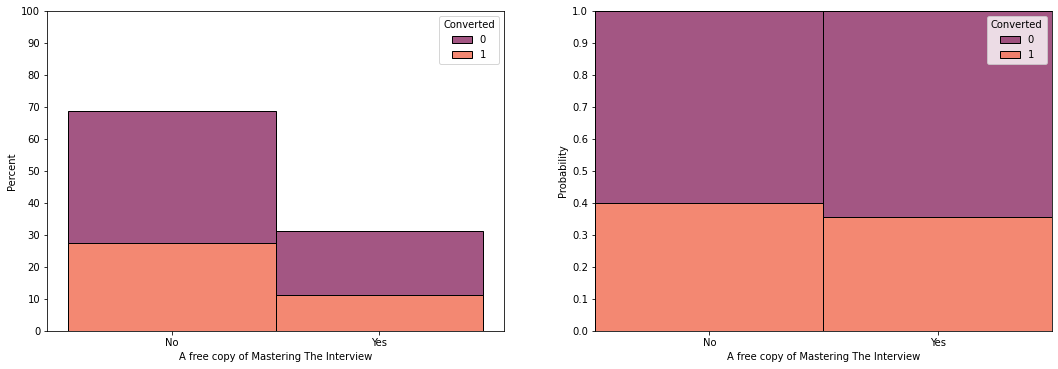

In [1232]:
u_df = getColDetails()
yesOrNoCols = list(u_df[u_df.length == 2].cols)


def percentageAndProbability(array, figSize, y=None, col=2):
    for i in range(0, len(array)):
        plt.figure(figsize=figSize)
        plt.subplot(len(array) if col == 2 else len(array)*2, col, (2*i)+1)
        sns.histplot( data=df, x=array[i] if y is None else None, y= None if y is None else array[i], hue="Converted",multiple='stack', element='bars',
                 palette="rocket", stat='percent')
        plt.yticks(range(0,101,10)) if y is None else plt.xticks(np.arange(0,100.25,2.5), rotation=90)

        plt.subplot(len(array) if col == 2 else len(array)*2 , col, (2*i)+2)
        sns.histplot( data=df, x=array[i] if y is None else None, y= None if y is None else array[i], hue="Converted",multiple='fill', element='bars',
                 palette="rocket", stat='probability')
        plt.yticks(np.arange(0.0,1.1,0.1)) if y is None else plt.xticks(np.arange(0.0,1.025,0.025), rotation=90)
    plt.show()
    
percentageAndProbability(yesOrNoCols, [18,20])

In [1233]:
restOfCatCols = list(u_df[(u_df.length > 2) & (u_df.length < 27)].cols)

In [1234]:
restOfCatCols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'What is your current occupation',
 'Tags',
 'Last Notable Activity']

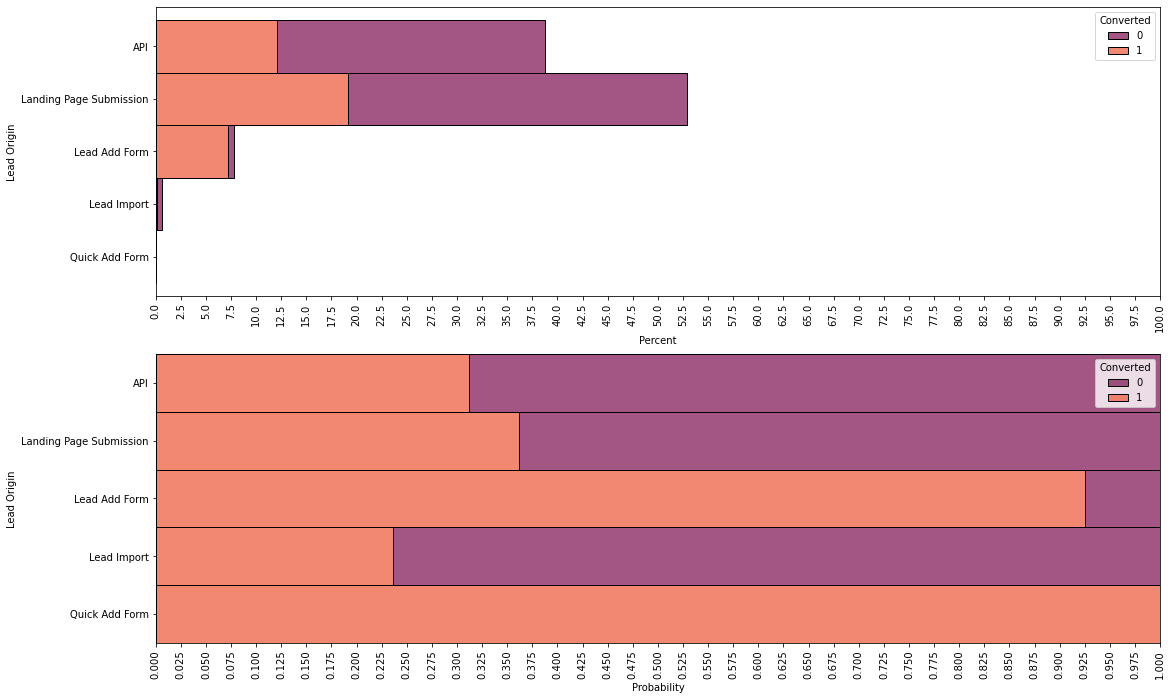

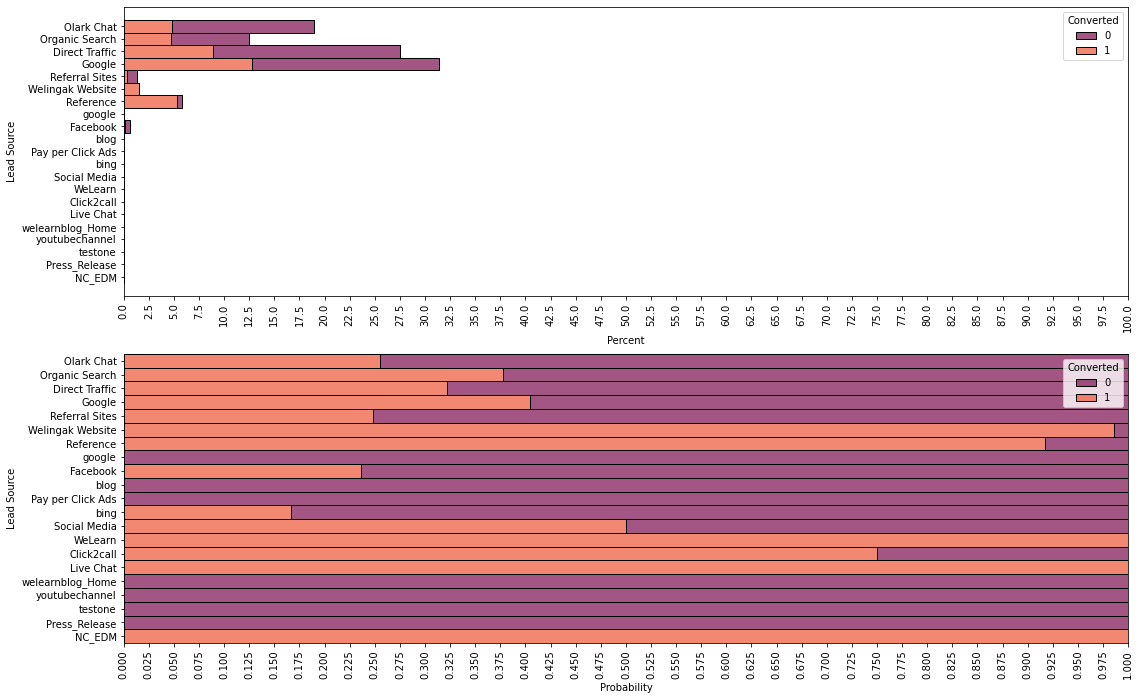

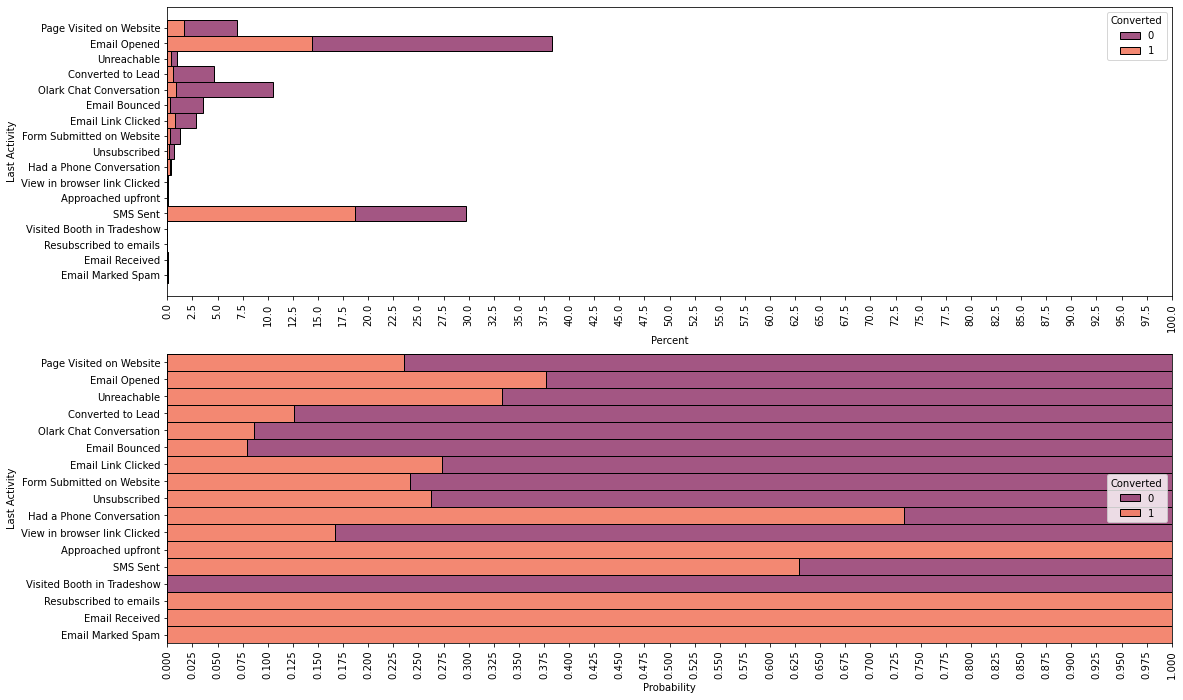

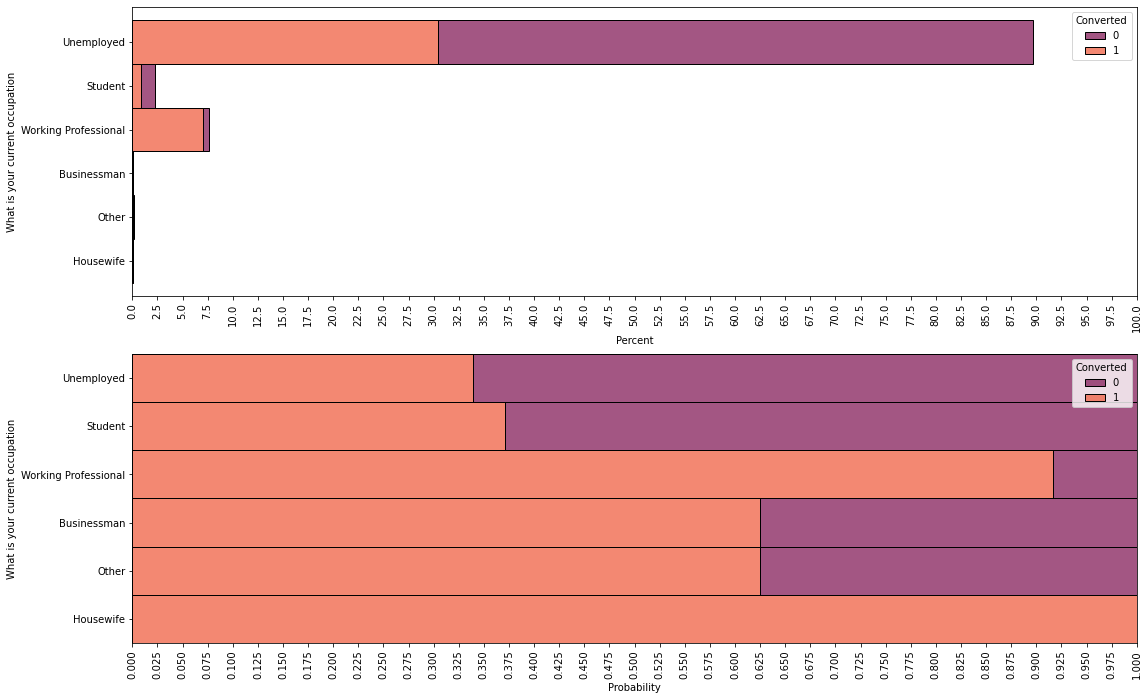

In [1235]:
percentageAndProbability(restOfCatCols[:4], [18,50], y='non none', col = 1)

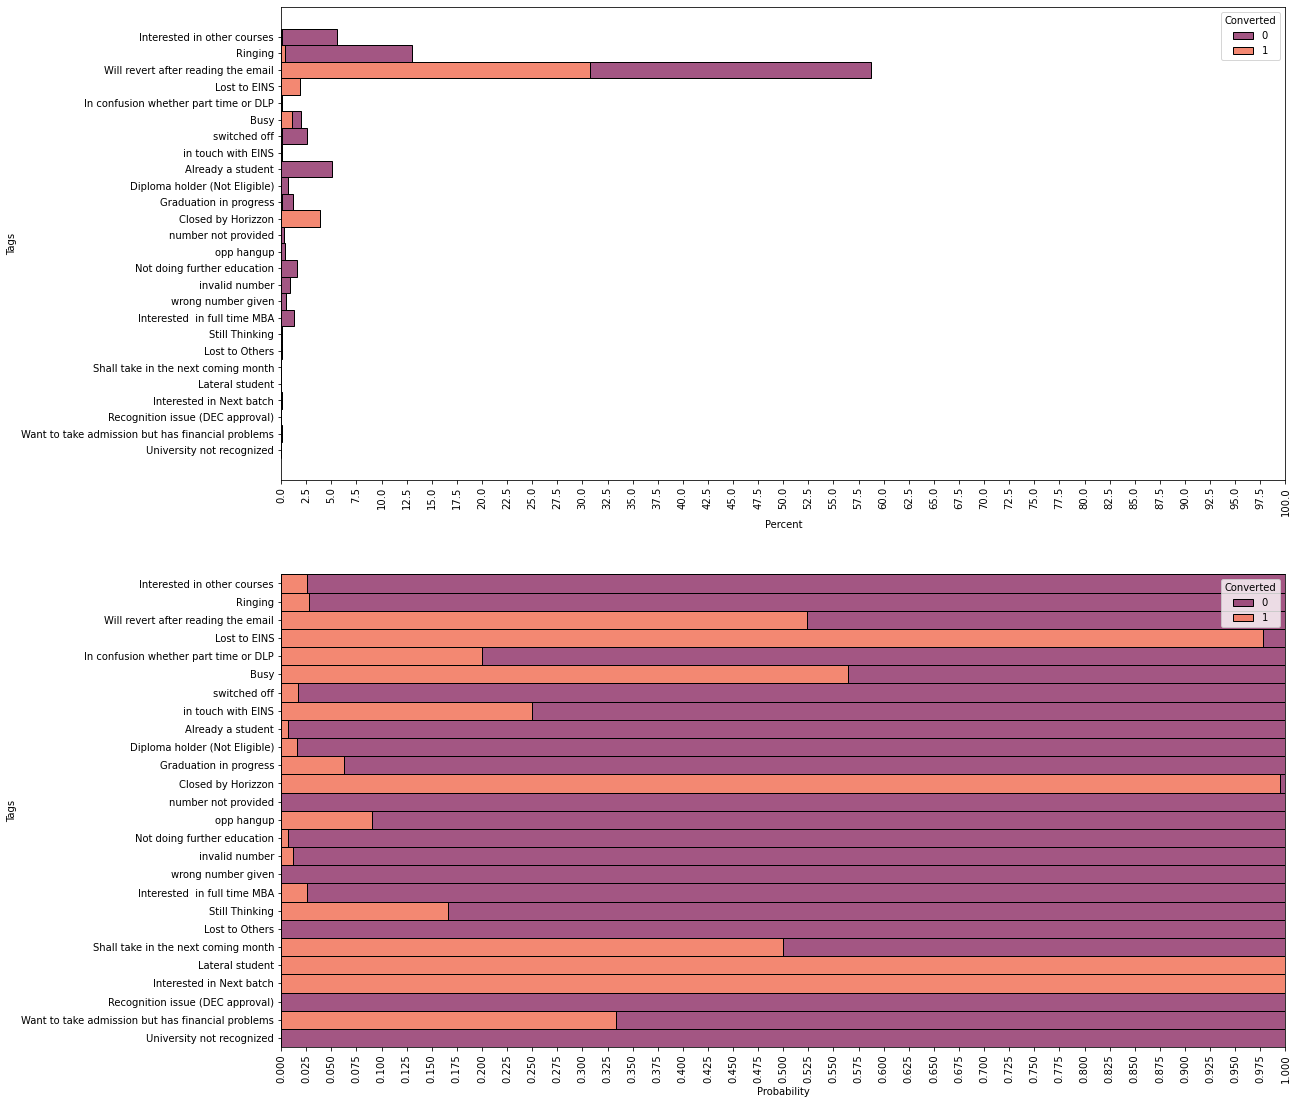

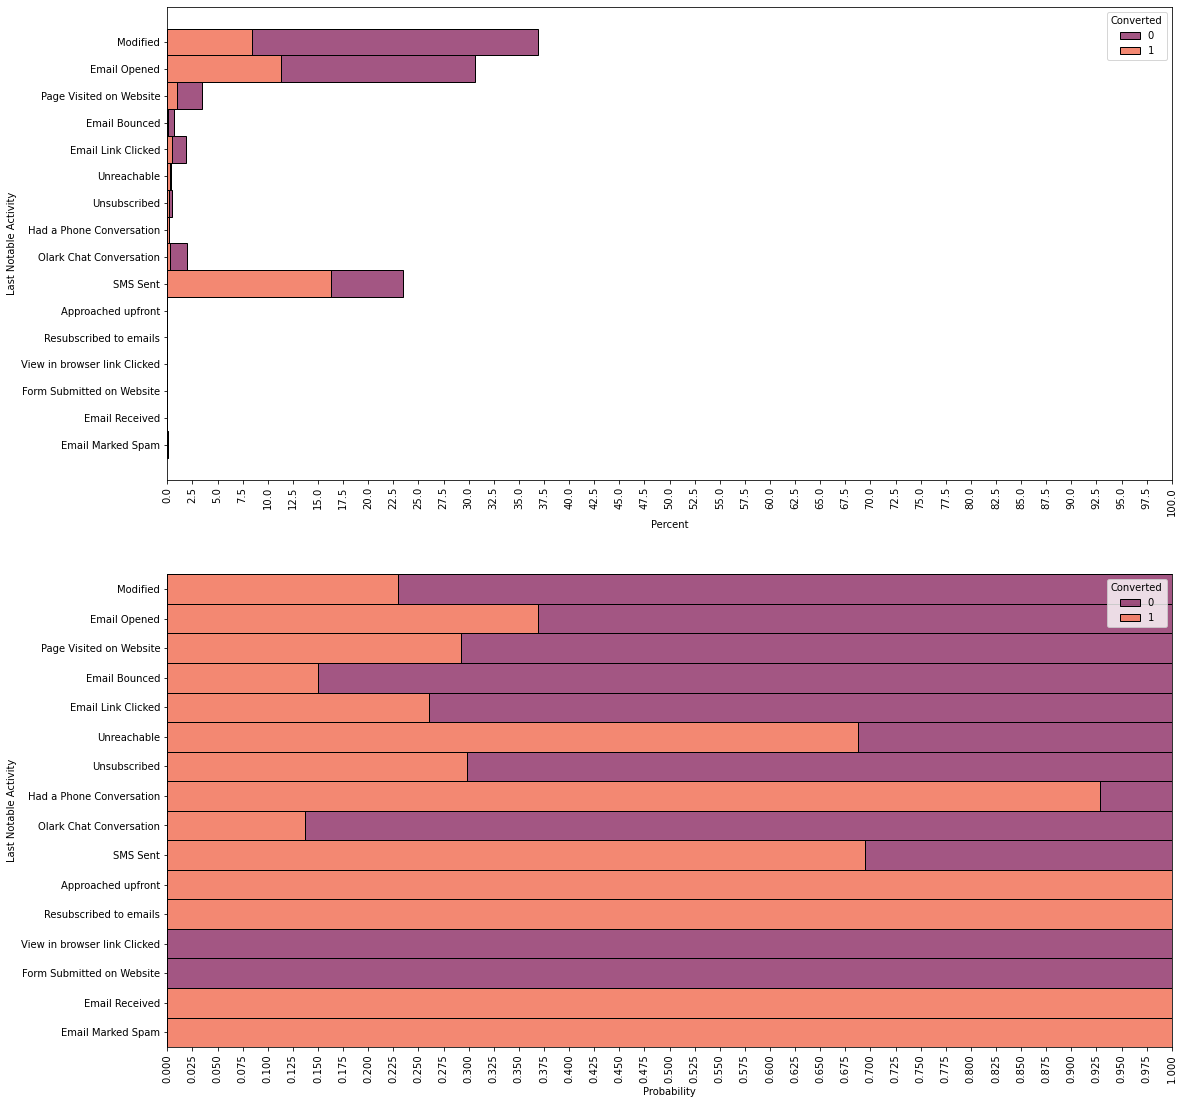

In [1236]:
percentageAndProbability(restOfCatCols[4:], [18,40], y='non none', col = 1)

In [1237]:
u_df

,cols,unique,dataType,length,value_count_for2
0,Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",object,5,Landing Page Submission 52.879 API ...
1,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",object,21,Google 31.429 Direct Traffic ...
2,Do Not Email,"[No, Yes]",object,2,No 92.056 Yes 7.944 Name: Do Not Email...
3,Converted,"[0, 1]",int64,2,"0 61.461 1 38.539 Name: Converted, dtype..."
4,TotalVisits,"[0.0, 5.0, 2.0, 1.0, 4.0, 8.0, 11.0, 6.0, 3.0,...",float64,41,0.0 23.690 2.0 18.182 3.0 15.61...
5,Total Time Spent on Website,"[0, 674, 1532, 305, 1428, 1640, 71, 58, 1351, ...",int64,1731,0 23.734 60 0.206 74 0.195 7...
6,Page Views Per Visit,"[0.0, 2.5, 2.0, 1.0, 4.0, 8.0, 2.67, 11.0, 5.0...",float64,114,0.00 23.690 2.00 20.909 3.00 12.944 4...
7,Last Activity,"[Page Visited on Website, Email Opened, Unreac...",object,17,Email Opened 38.312 SMS Sen...
8,Country,"[India, Russia, Kuwait, Oman, United Arab Emir...",object,38,India 96.894 United States ...
9,What is your current occupation,"[Unemployed, Student, Working Professional, Bu...",object,6,Unemployed 89.719 Working Profess...


#### Let's create dummy variables for categorical variables

In [1238]:
cols = list(df.columns)

for i in ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']:
    cols.remove(i)

dummies = pd.get_dummies(df[cols], drop_first=True)
dummies


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [1239]:
df = pd.concat([df, dummies], axis=1)
df.drop(labels=cols, axis=1, inplace=True)
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [1240]:
df.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=128)

In [1241]:
# before spliting the test train data, lets check the data distribution of Converted

df.Converted.value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

#### distribution is 60-40, its a good distribution to work on.

### Let's split the data into test and train data set

In [1242]:
x = df.drop(labels='Converted', axis=1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [1243]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1244]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [1245]:
x_train.shape

(6468, 127)

In [1246]:
y_train.shape

(6468,)

In [1247]:
x_test.shape

(2772, 127)

In [1248]:
y_test.shape

(2772,)

#### TotalVisits, Total Time Spent on Website, Page Views Per Visit = have continues value and we can do min max scaling to these

In [1249]:
from sklearn.preprocessing import MinMaxScaler

In [1250]:
scaler = MinMaxScaler()

In [1251]:
minMax_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

x_train[minMax_cols] = scaler.fit_transform(x_train[minMax_cols])

In [1252]:
x_train[minMax_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6468.000000,6468.000000,6468.000000
mean,0.013815,0.212974,0.042686
std,0.021048,0.240566,0.039326
min,0.000000,0.000000,0.000000
25%,0.003984,0.005282,0.018182
50%,0.011952,0.108275,0.036364
75%,0.019920,0.407790,0.054545
max,1.000000,1.000000,1.000000


### Create a model Using RFE

In [1253]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=15)
rfe = rfe.fit(x_train, y_train)

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [1254]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 5),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Pay per Click Ads', False, 6),
 ('Lead Source_Press_Release', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 5),
 ('Lead Source_blog', True, 1),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 6),
 ('Lead Source_welearnblog_Ho

In [1255]:
rfe_cols = x_train.columns[rfe.support_]

In [1256]:
rfe_cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_blog', 'Lead Source_google', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Marked Spam',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Country_Australia', 'Country_Canada', 'Country_Germany',
       'Country_Hong Kong', 'Country_Qatar', 'Country_Saudi Arabia',
       'Country_South Africa', 'Country_United States', 'Country_unknown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       

In [1257]:
rfe_cols.shape

(63,)

In [1258]:
cols = rfe_cols
def getLog ():
    x_train_sm = sm.add_constant(x_train[cols])
    log_mod = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
    return log_mod.fit()

getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6405
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 27 Feb 2023   Deviance:                   1.0316e+05
Time:                        17:19:09   Pearson chi2:                 5.04e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -1.506e+15   6.16e+06  -2.45e+08      0.000   -1.51e+15   -1.51e+15
TotalVisits                                             7.302e+14   4.42e+07   1.65e+07      0.000     7.3e+14     7.3e+14
Total Time Spent on Website                             2.056e+15   4.05e+06   5.08e+08      0.000    2.06e+15    2.06e+15
Lead Origin_Lead Add Form                                 1.3e+15   1.19e+07   1.09e+08      0.000     1.3e+15     1.3e+15
Lead Origin_Lead Import                                  4.21e+15   4.95e+07    8.5e+07      0.000    4.21e+15    4.21e+15
Lead Origin_Quick Add Form                              6.216e+15   6.74e+07   9.23e+07      0.000    6.22e+15    6.22e+15
Lead Source_Facebook                                   -3.648e+15   4.94e+07  -7.38e+07      0.000   -3.65e+15   -3.65e+15
Lead Source_NC_EDM                                       5.17e+15   6.71e+07    7.7e+07      0.000    5.17e+15    5.17e+15
Lead Source_Olark Chat                                  2.365e+14   2.72e+06   8.69e+07      0.000    2.36e+14    2.36e+14
Lead Source_Reference                                   7.381e+13   1.23e+07   5.98e+06      0.000    7.38e+13    7.38e+13
Lead Source_Social Media                                1.038e+15   4.76e+07   2.18e+07      0.000    1.04e+15    1.04e+15
Lead Source_Welingak Website                            5.222e+14   1.37e+07   3.81e+07      0.000    5.22e+14    5.22e+14
Lead Source_blog                                       -3.201e+15   6.71e+07  -4.77e+07      0.000    -3.2e+15    -3.2e+15
Lead Source_google                                     -1.464e+15   3.02e+07  -4.85e+07      0.000   -1.46e+15   -1.46e+15
Do Not Email_Yes                                       -1.038e+14   4.15e+06   -2.5e+07      0.000   -1.04e+14   -1.04e+14
Last Activity_Converted to Lead                        -2.584e+14    4.8e+06  -5.38e+07      0.000   -2.58e+14   -2.58e+14
Last Activity_Email Bounced                            -6.907e+14    6.7e+06  -1.03e+08      0.000   -6.91e+14   -6.91e+14
Last Activity_Email Marked Spam                         2.459e+15   3.47e+07   7.08e+07      0.000    2.46e+15    2.46e+15
Last Activity_Had a Phone Conversation                  -5.18e+14   2.05e+07  -2.53e+07      0.000   -5.18e+14   -5.18e+14
Last Activity_Olark Chat Conversation                   3.967e+14   4.12e+06   9.62e+07      0.000    3.97e+14    3.97e+14
Last Activity_Page Visited on Website                  -2.901e+14    5.2e+06  -5.58e+07      0.000    -2.9e+14    -2.9e+14
Last Activity_SMS Sent                                 -1.708e+13   4.28e+06  -3.99e+06      0.000   -1.71e+13   -1.71e+13
Country_

In [1259]:
#lets check the co-releation

from statsmodels.stats.outliers_influence import variance_inflation_factor

def getVIF ():
    vif = pd.DataFrame()
    vif['Features'] = x_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(x_train[cols].values, i) for i in range(x_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

getVIF()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
56,Last Notable Activity_Email Marked Spam,inf
16,Last Activity_Email Marked Spam,inf
3,Lead Origin_Lead Import,17.95
5,Lead Source_Facebook,17.88
31,What is your current occupation_Unemployed,17.75
...,...,...
46,Tags_Shall take in the next coming month,1.00
29,Country_unknown,1.00
11,Lead Source_blog,1.00
9,Lead Source_Social Media,1.00


In [1260]:
cols = cols.drop('Last Notable Activity_Email Marked Spam', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6405
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1652.0
Date:                Mon, 27 Feb 2023   Deviance:                       3304.0
Time:                        17:19:11   Pearson chi2:                 1.54e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5589
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.3771      0.542     -8.078      0.000      -5.439      -3.315
TotalVisits                                                6.3523      1.657      3.834      0.000       3.105       9.599
Total Time Spent on Website                                4.7427      0.222     21.352      0.000       4.307       5.178
Lead Origin_Lead Add Form                                  3.1501      0.626      5.035      0.000       1.924       4.376
Lead Origin_Lead Import                                   22.8577   3.12e+04      0.001      0.999   -6.12e+04    6.13e+04
Lead Origin_Quick Add Form                                26.0208   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                     -22.5633   3.12e+04     -0.001      0.999   -6.13e+04    6.12e+04
Lead Source_NC_EDM                                        25.0196   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Olark Chat                                     0.8014      0.130      6.168      0.000       0.547       1.056
Lead Source_Reference                                      0.2145      0.671      0.320      0.749      -1.100       1.529
Lead Source_Social Media                                   3.7105      2.467      1.504      0.133      -1.126       8.547
Lead Source_Welingak Website                               1.6112      0.957      1.683      0.092      -0.265       3.487
Lead Source_blog                                         -25.5064   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_google                                       -24.2587   9.09e+04     -0.000      1.000   -1.78e+05    1.78e+05
Do Not Email_Yes                                          -1.0661      0.242     -4.400      0.000      -1.541      -0.591
Last Activity_Converted to Lead                           -0.5297      0.320     -1.655      0.098      -1.157       0.097
Last Activity_Email Bounced                               -1.4309      0.541     -2.644      0.008      -2.492      -0.370
Last Activity_Email Marked Spam                           25.6407   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Last Activity_Had a Phone Conversation                     0.3278      1.060      0.309      0.757      -1.749       2.405
Last Activity_Olark Chat Conversation                     -0.7691      0.256     -3.008      0.003      -1.270      -0.268
Last Activity_Page Visited on Website                     -0.3288      0.313     -1.049      0.294      -0.943       0.285
Last Activity_SMS Sent                                     0.6713      0.218      3.082      0.002       0.244       1.098
Country_

In [1261]:
cols = cols.drop('Lead Origin_Quick Add Form', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6406
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1652.9
Date:                Mon, 27 Feb 2023   Deviance:                       3305.8
Time:                        17:19:11   Pearson chi2:                 1.49e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5588
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.3881      0.542     -8.098      0.000      -5.450      -3.326
TotalVisits                                                6.3472      1.656      3.833      0.000       3.101       9.593
Total Time Spent on Website                                4.7558      0.222     21.426      0.000       4.321       5.191
Lead Origin_Lead Add Form                                  3.1179      0.620      5.025      0.000       1.902       4.334
Lead Origin_Lead Import                                   22.8485   3.12e+04      0.001      0.999   -6.12e+04    6.13e+04
Lead Source_Facebook                                     -22.5528   3.12e+04     -0.001      0.999   -6.13e+04    6.12e+04
Lead Source_NC_EDM                                        25.0172   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Olark Chat                                     0.8038      0.130      6.187      0.000       0.549       1.058
Lead Source_Reference                                      0.2424      0.666      0.364      0.716      -1.064       1.548
Lead Source_Social Media                                   3.7115      2.471      1.502      0.133      -1.131       8.554
Lead Source_Welingak Website                               1.6457      0.954      1.725      0.084      -0.224       3.515
Lead Source_blog                                         -25.5074   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_google                                       -24.2600   9.09e+04     -0.000      1.000   -1.78e+05    1.78e+05
Do Not Email_Yes                                          -1.0609      0.242     -4.381      0.000      -1.536      -0.586
Last Activity_Converted to Lead                           -0.5305      0.320     -1.657      0.097      -1.158       0.097
Last Activity_Email Bounced                               -1.3089      0.522     -2.508      0.012      -2.332      -0.286
Last Activity_Email Marked Spam                           25.6288   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Last Activity_Had a Phone Conversation                     0.3245      1.060      0.306      0.759      -1.753       2.402
Last Activity_Olark Chat Conversation                     -0.7692      0.256     -3.008      0.003      -1.270      -0.268
Last Activity_Page Visited on Website                     -0.3305      0.313     -1.054      0.292      -0.945       0.284
Last Activity_SMS Sent                                     0.6706      0.218      3.078      0.002       0.244       1.098
Country_Australia                                         -1.9991      1.465     -1.365      0.172      -4.870       0.871
Country_

In [1262]:
cols = cols.drop('Lead Source_NC_EDM', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6407
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1653.4
Date:                Mon, 27 Feb 2023   Deviance:                       3306.7
Time:                        17:19:12   Pearson chi2:                 1.49e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5587
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.3891      0.542     -8.099      0.000      -5.451      -3.327
TotalVisits                                                6.3573      1.657      3.837      0.000       3.110       9.605
Total Time Spent on Website                                4.7582      0.222     21.434      0.000       4.323       5.193
Lead Origin_Lead Add Form                                  3.1179      0.621      5.025      0.000       1.902       4.334
Lead Origin_Lead Import                                   22.8454   3.12e+04      0.001      0.999   -6.12e+04    6.13e+04
Lead Source_Facebook                                     -22.5504   3.12e+04     -0.001      0.999   -6.13e+04    6.12e+04
Lead Source_Olark Chat                                     0.8034      0.130      6.184      0.000       0.549       1.058
Lead Source_Reference                                      0.2424      0.666      0.364      0.716      -1.064       1.548
Lead Source_Social Media                                   3.7118      2.472      1.501      0.133      -1.134       8.557
Lead Source_Welingak Website                               1.6455      0.954      1.725      0.085      -0.224       3.515
Lead Source_blog                                         -25.5095   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_google                                       -24.2604   9.09e+04     -0.000      1.000   -1.78e+05    1.78e+05
Do Not Email_Yes                                          -1.0613      0.242     -4.382      0.000      -1.536      -0.587
Last Activity_Converted to Lead                           -0.5307      0.320     -1.658      0.097      -1.158       0.097
Last Activity_Email Bounced                               -1.3089      0.522     -2.508      0.012      -2.332      -0.286
Last Activity_Email Marked Spam                           25.6270   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Last Activity_Had a Phone Conversation                     0.3237      1.060      0.305      0.760      -1.754       2.401
Last Activity_Olark Chat Conversation                     -0.7687      0.256     -3.006      0.003      -1.270      -0.268
Last Activity_Page Visited on Website                     -0.3308      0.314     -1.055      0.291      -0.945       0.284
Last Activity_SMS Sent                                     0.6705      0.218      3.078      0.002       0.243       1.097
Country_Australia                                         -2.0001      1.464     -1.366      0.172      -4.870       0.870
Country_Canada                                           -23.1064   9.34e+04     -0.000      1.000   -1.83e+05    1.83e+05
Country_

In [1263]:
cols= cols.drop('Last Activity_Email Marked Spam', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6408
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1654.0
Date:                Mon, 27 Feb 2023   Deviance:                       3307.9
Time:                        17:19:12   Pearson chi2:                 1.49e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5587
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.3927      0.542     -8.104      0.000      -5.455      -3.330
TotalVisits                                                6.3656      1.658      3.839      0.000       3.116       9.615
Total Time Spent on Website                                4.7677      0.222     21.487      0.000       4.333       5.203
Lead Origin_Lead Add Form                                  3.1147      0.621      5.019      0.000       1.898       4.331
Lead Origin_Lead Import                                   23.3335   3.13e+04      0.001      0.999   -6.13e+04    6.14e+04
Lead Source_Facebook                                     -23.0363   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
Lead Source_Olark Chat                                     0.8051      0.130      6.195      0.000       0.550       1.060
Lead Source_Reference                                      0.2477      0.666      0.372      0.710      -1.058       1.554
Lead Source_Social Media                                   3.7137      2.475      1.500      0.134      -1.138       8.565
Lead Source_Welingak Website                               1.6497      0.954      1.729      0.084      -0.220       3.519
Lead Source_blog                                         -25.5103   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_google                                       -24.2614   9.09e+04     -0.000      1.000   -1.78e+05    1.78e+05
Do Not Email_Yes                                          -1.0389      0.240     -4.322      0.000      -1.510      -0.568
Last Activity_Converted to Lead                           -0.5301      0.320     -1.656      0.098      -1.157       0.097
Last Activity_Email Bounced                               -1.3298      0.521     -2.552      0.011      -2.351      -0.309
Last Activity_Had a Phone Conversation                     0.3226      1.060      0.304      0.761      -1.755       2.400
Last Activity_Olark Chat Conversation                     -0.7681      0.256     -3.004      0.003      -1.269      -0.267
Last Activity_Page Visited on Website                     -0.3337      0.313     -1.064      0.287      -0.948       0.281
Last Activity_SMS Sent                                     0.6688      0.218      3.069      0.002       0.242       1.096
Country_Australia                                         -1.9987      1.464     -1.365      0.172      -4.868       0.871
Country_Canada                                           -23.1145   9.34e+04     -0.000      1.000   -1.83e+05    1.83e+05
Country_Germany                                            2.4534      1.347      1.821      0.069      -0.187       5.093
Country_

In [1264]:
cols = cols.drop('Lead Source_blog', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6409
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1654.6
Date:                Mon, 27 Feb 2023   Deviance:                       3309.2
Time:                        17:19:12   Pearson chi2:                 1.49e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5586
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.3928      0.542     -8.105      0.000      -5.455      -3.331
TotalVisits                                                6.3686      1.658      3.840      0.000       3.118       9.619
Total Time Spent on Website                                4.7673      0.222     21.487      0.000       4.332       5.202
Lead Origin_Lead Add Form                                  3.1157      0.621      5.021      0.000       1.899       4.332
Lead Origin_Lead Import                                   23.3381   3.13e+04      0.001      0.999   -6.14e+04    6.14e+04
Lead Source_Facebook                                     -23.0395   3.13e+04     -0.001      0.999   -6.14e+04    6.14e+04
Lead Source_Olark Chat                                     0.8066      0.130      6.206      0.000       0.552       1.061
Lead Source_Reference                                      0.2478      0.666      0.372      0.710      -1.058       1.554
Lead Source_Social Media                                   3.7141      2.475      1.501      0.133      -1.136       8.564
Lead Source_Welingak Website                               1.6500      0.954      1.730      0.084      -0.220       3.520
Lead Source_google                                       -24.2609   9.09e+04     -0.000      1.000   -1.78e+05    1.78e+05
Do Not Email_Yes                                          -1.0385      0.240     -4.320      0.000      -1.510      -0.567
Last Activity_Converted to Lead                           -0.5296      0.320     -1.654      0.098      -1.157       0.098
Last Activity_Email Bounced                               -1.3300      0.521     -2.553      0.011      -2.351      -0.309
Last Activity_Had a Phone Conversation                     0.3233      1.060      0.305      0.760      -1.754       2.401
Last Activity_Olark Chat Conversation                     -0.7687      0.256     -3.006      0.003      -1.270      -0.267
Last Activity_Page Visited on Website                     -0.3334      0.313     -1.064      0.288      -0.948       0.281
Last Activity_SMS Sent                                     0.6690      0.218      3.070      0.002       0.242       1.096
Country_Australia                                         -1.9978      1.464     -1.364      0.172      -4.868       0.872
Country_Canada                                           -23.1132   9.34e+04     -0.000      1.000   -1.83e+05    1.83e+05
Country_Germany                                            2.4543      1.347      1.822      0.068      -0.186       5.095
Country_Hong Kong                                          3.2302      1.438      2.246      0.025       0.411       6.049
Country_

In [1265]:
cols = cols.drop('Lead Source_google', 1)

In [1266]:
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6410
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1655.8
Date:                Mon, 27 Feb 2023   Deviance:                       3311.7
Time:                        17:19:13   Pearson chi2:                 1.50e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5584
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.3899      0.542     -8.100      0.000      -5.452      -3.328
TotalVisits                                                6.3608      1.658      3.836      0.000       3.111       9.610
Total Time Spent on Website                                4.7665      0.222     21.490      0.000       4.332       5.201
Lead Origin_Lead Add Form                                  3.1180      0.621      5.024      0.000       1.902       4.334
Lead Origin_Lead Import                                   23.3454   3.13e+04      0.001      0.999   -6.13e+04    6.14e+04
Lead Source_Facebook                                     -23.0438   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
Lead Source_Olark Chat                                     0.8083      0.130      6.218      0.000       0.554       1.063
Lead Source_Reference                                      0.2481      0.666      0.372      0.710      -1.058       1.554
Lead Source_Social Media                                   3.7306      2.489      1.499      0.134      -1.148       8.609
Lead Source_Welingak Website                               1.6505      0.954      1.730      0.084      -0.219       3.520
Do Not Email_Yes                                          -1.0393      0.240     -4.327      0.000      -1.510      -0.569
Last Activity_Converted to Lead                           -0.5187      0.320     -1.621      0.105      -1.146       0.109
Last Activity_Email Bounced                               -1.3191      0.521     -2.532      0.011      -2.340      -0.298
Last Activity_Had a Phone Conversation                     0.3350      1.060      0.316      0.752      -1.743       2.413
Last Activity_Olark Chat Conversation                     -0.7586      0.256     -2.967      0.003      -1.260      -0.257
Last Activity_Page Visited on Website                     -0.3565      0.312     -1.143      0.253      -0.968       0.255
Last Activity_SMS Sent                                     0.6782      0.218      3.115      0.002       0.252       1.105
Country_Australia                                         -1.9932      1.463     -1.363      0.173      -4.860       0.874
Country_Canada                                           -23.1112   9.34e+04     -0.000      1.000   -1.83e+05    1.83e+05
Country_Germany                                            2.4601      1.346      1.828      0.068      -0.178       5.098
Country_Hong Kong                                          3.2316      1.438      2.247      0.025       0.412       6.051
Country_Qatar                                            -25.0096   5.41e+04     -0.000      1.000   -1.06e+05    1.06e+05
Country_

In [1267]:
cols = cols.drop('Country_Canada', 1)

In [1268]:
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6411
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1656.3
Date:                Mon, 27 Feb 2023   Deviance:                       3312.5
Time:                        17:19:13   Pearson chi2:                 1.50e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5583
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.3911      0.542     -8.102      0.000      -5.453      -3.329
TotalVisits                                                6.3657      1.658      3.839      0.000       3.116       9.616
Total Time Spent on Website                                4.7697      0.222     21.503      0.000       4.335       5.204
Lead Origin_Lead Add Form                                  3.1220      0.621      5.031      0.000       1.906       4.338
Lead Origin_Lead Import                                   23.3510   3.13e+04      0.001      0.999   -6.13e+04    6.13e+04
Lead Source_Facebook                                     -23.0474   3.13e+04     -0.001      0.999   -6.13e+04    6.13e+04
Lead Source_Olark Chat                                     0.8101      0.130      6.231      0.000       0.555       1.065
Lead Source_Reference                                      0.2465      0.666      0.370      0.712      -1.060       1.553
Lead Source_Social Media                                   3.7309      2.489      1.499      0.134      -1.148       8.610
Lead Source_Welingak Website                               1.6497      0.954      1.729      0.084      -0.220       3.519
Do Not Email_Yes                                          -1.0487      0.239     -4.380      0.000      -1.518      -0.579
Last Activity_Converted to Lead                           -0.5184      0.320     -1.620      0.105      -1.146       0.109
Last Activity_Email Bounced                               -1.3117      0.521     -2.518      0.012      -2.333      -0.291
Last Activity_Had a Phone Conversation                     0.3348      1.060      0.316      0.752      -1.743       2.413
Last Activity_Olark Chat Conversation                     -0.7586      0.256     -2.967      0.003      -1.260      -0.257
Last Activity_Page Visited on Website                     -0.3554      0.312     -1.140      0.254      -0.967       0.256
Last Activity_SMS Sent                                     0.6753      0.218      3.103      0.002       0.249       1.102
Country_Australia                                         -1.9924      1.464     -1.361      0.173      -4.861       0.876
Country_Germany                                            2.4615      1.346      1.829      0.067      -0.176       5.099
Country_Hong Kong                                          3.2336      1.439      2.248      0.025       0.414       6.054
Country_Qatar                                            -25.0098   5.41e+04     -0.000      1.000   -1.06e+05    1.06e+05
Country_Saudi Arabia                                      -1.0005      0.979     -1.022      0.307      -2.919       0.918
Country_

In [1269]:
cols = cols.drop('Country_Qatar', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6412
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1658.7
Date:                Mon, 27 Feb 2023   Deviance:                       3317.4
Time:                        17:19:13   Pearson chi2:                 1.49e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5580
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.3892      0.542     -8.101      0.000      -5.451      -3.327
TotalVisits                                                6.3684      1.659      3.839      0.000       3.117       9.619
Total Time Spent on Website                                4.7677      0.222     21.513      0.000       4.333       5.202
Lead Origin_Lead Add Form                                  3.1240      0.620      5.036      0.000       1.908       4.340
Lead Origin_Lead Import                                   23.3520   3.13e+04      0.001      0.999   -6.13e+04    6.14e+04
Lead Source_Facebook                                     -23.0461   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
Lead Source_Olark Chat                                     0.8133      0.130      6.260      0.000       0.559       1.068
Lead Source_Reference                                      0.2466      0.666      0.370      0.711      -1.059       1.552
Lead Source_Social Media                                   3.7312      2.487      1.501      0.133      -1.142       8.605
Lead Source_Welingak Website                               1.6501      0.954      1.730      0.084      -0.219       3.519
Do Not Email_Yes                                          -1.0449      0.239     -4.367      0.000      -1.514      -0.576
Last Activity_Converted to Lead                           -0.5146      0.320     -1.608      0.108      -1.142       0.113
Last Activity_Email Bounced                               -1.3116      0.521     -2.518      0.012      -2.333      -0.291
Last Activity_Had a Phone Conversation                     0.3393      1.060      0.320      0.749      -1.739       2.417
Last Activity_Olark Chat Conversation                     -0.7572      0.256     -2.962      0.003      -1.258      -0.256
Last Activity_Page Visited on Website                     -0.3523      0.312     -1.130      0.259      -0.963       0.259
Last Activity_SMS Sent                                     0.6781      0.217      3.118      0.002       0.252       1.104
Country_Australia                                         -1.9900      1.463     -1.360      0.174      -4.858       0.878
Country_Germany                                            2.4615      1.345      1.830      0.067      -0.175       5.098
Country_Hong Kong                                          3.2301      1.438      2.247      0.025       0.412       6.048
Country_Saudi Arabia                                      -0.9979      0.979     -1.019      0.308      -2.917       0.921
Country_South Africa                                       2.7977      2.259      1.238      0.216      -1.630       7.225
Country_

In [1270]:
cols = cols.drop('What is your current occupation_Housewife', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6413
Model Family:                Binomial   Df Model:                           54
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1660.0
Date:                Mon, 27 Feb 2023   Deviance:                       3320.0
Time:                        17:19:13   Pearson chi2:                 1.50e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5578
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.3008      0.535     -8.037      0.000      -5.350      -3.252
TotalVisits                                                6.3569      1.657      3.837      0.000       3.110       9.604
Total Time Spent on Website                                4.7634      0.222     21.501      0.000       4.329       5.198
Lead Origin_Lead Add Form                                  3.1254      0.621      5.036      0.000       1.909       4.342
Lead Origin_Lead Import                                   23.4825   3.13e+04      0.001      0.999   -6.13e+04    6.14e+04
Lead Source_Facebook                                     -23.1794   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
Lead Source_Olark Chat                                     0.8095      0.130      6.233      0.000       0.555       1.064
Lead Source_Reference                                      0.2483      0.666      0.373      0.709      -1.058       1.554
Lead Source_Social Media                                   3.7379      2.493      1.500      0.134      -1.148       8.624
Lead Source_Welingak Website                               1.6452      0.954      1.725      0.085      -0.224       3.515
Do Not Email_Yes                                          -1.0468      0.239     -4.374      0.000      -1.516      -0.578
Last Activity_Converted to Lead                           -0.5266      0.320     -1.647      0.100      -1.153       0.100
Last Activity_Email Bounced                               -1.3317      0.520     -2.560      0.010      -2.351      -0.312
Last Activity_Had a Phone Conversation                     0.3317      1.060      0.313      0.754      -1.746       2.410
Last Activity_Olark Chat Conversation                     -0.7655      0.255     -2.998      0.003      -1.266      -0.265
Last Activity_Page Visited on Website                     -0.3653      0.311     -1.173      0.241      -0.976       0.245
Last Activity_SMS Sent                                     0.6696      0.217      3.084      0.002       0.244       1.095
Country_Australia                                         -1.9940      1.465     -1.361      0.174      -4.866       0.878
Country_Germany                                            2.4625      1.347      1.828      0.068      -0.178       5.103
Country_Hong Kong                                          3.2321      1.437      2.249      0.025       0.415       6.049
Country_Saudi Arabia                                      -0.9982      0.979     -1.020      0.308      -2.916       0.920
Country_South Africa                                       2.8034      2.264      1.239      0.216      -1.633       7.240
Country_

In [1271]:
cols = cols.drop('Tags_Interested in Next batch', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6414
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1665.7
Date:                Mon, 27 Feb 2023   Deviance:                       3331.3
Time:                        17:19:13   Pearson chi2:                 1.51e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5571
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.9030      0.453     -8.617      0.000      -4.791      -3.015
TotalVisits                                                6.3221      1.653      3.824      0.000       3.082       9.563
Total Time Spent on Website                                4.7762      0.221     21.654      0.000       4.344       5.208
Lead Origin_Lead Add Form                                  3.1130      0.621      5.010      0.000       1.895       4.331
Lead Origin_Lead Import                                   23.3744   3.13e+04      0.001      0.999   -6.13e+04    6.13e+04
Lead Source_Facebook                                     -23.0664   3.13e+04     -0.001      0.999   -6.13e+04    6.13e+04
Lead Source_Olark Chat                                     0.8059      0.130      6.211      0.000       0.552       1.060
Lead Source_Reference                                      0.2982      0.667      0.447      0.655      -1.009       1.605
Lead Source_Social Media                                   3.7352      2.496      1.497      0.134      -1.156       8.627
Lead Source_Welingak Website                               1.6563      0.955      1.735      0.083      -0.215       3.527
Do Not Email_Yes                                          -1.0021      0.238     -4.210      0.000      -1.469      -0.536
Last Activity_Converted to Lead                           -0.5235      0.319     -1.640      0.101      -1.149       0.102
Last Activity_Email Bounced                               -1.3658      0.520     -2.625      0.009      -2.386      -0.346
Last Activity_Had a Phone Conversation                     0.3319      1.060      0.313      0.754      -1.745       2.409
Last Activity_Olark Chat Conversation                     -0.7606      0.255     -2.981      0.003      -1.261      -0.260
Last Activity_Page Visited on Website                     -0.3661      0.311     -1.177      0.239      -0.976       0.244
Last Activity_SMS Sent                                     0.6666      0.217      3.070      0.002       0.241       1.092
Country_Australia                                         -1.9848      1.462     -1.357      0.175      -4.851       0.882
Country_Germany                                            2.4672      1.347      1.831      0.067      -0.174       5.108
Country_Hong Kong                                          3.2476      1.442      2.253      0.024       0.422       6.073
Country_Saudi Arabia                                      -1.0091      0.978     -1.032      0.302      -2.926       0.908
Country_South Africa                                       2.8126      2.267      1.241      0.215      -1.630       7.256
Country_

In [1272]:
cols = cols.drop('Tags_Lateral student', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6415
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1675.3
Date:                Mon, 27 Feb 2023   Deviance:                       3350.6
Time:                        17:19:14   Pearson chi2:                 1.52e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5557
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.6663      0.422     -8.683      0.000      -4.494      -2.839
TotalVisits                                                6.3130      1.652      3.821      0.000       3.075       9.551
Total Time Spent on Website                                4.7549      0.220     21.656      0.000       4.325       5.185
Lead Origin_Lead Add Form                                  3.1104      0.621      5.008      0.000       1.893       4.328
Lead Origin_Lead Import                                   23.2954   3.13e+04      0.001      0.999   -6.13e+04    6.13e+04
Lead Source_Facebook                                     -22.9980   3.13e+04     -0.001      0.999   -6.13e+04    6.13e+04
Lead Source_Olark Chat                                     0.8106      0.129      6.265      0.000       0.557       1.064
Lead Source_Reference                                      0.3170      0.666      0.476      0.634      -0.989       1.623
Lead Source_Social Media                                   3.7307      2.482      1.503      0.133      -1.133       8.595
Lead Source_Welingak Website                               1.6479      0.954      1.727      0.084      -0.222       3.518
Do Not Email_Yes                                          -1.0115      0.238     -4.258      0.000      -1.477      -0.546
Last Activity_Converted to Lead                           -0.5191      0.318     -1.630      0.103      -1.143       0.105
Last Activity_Email Bounced                               -1.3475      0.520     -2.591      0.010      -2.367      -0.328
Last Activity_Had a Phone Conversation                     0.3396      1.059      0.321      0.748      -1.736       2.415
Last Activity_Olark Chat Conversation                     -0.7654      0.255     -3.005      0.003      -1.265      -0.266
Last Activity_Page Visited on Website                     -0.3597      0.311     -1.158      0.247      -0.969       0.249
Last Activity_SMS Sent                                     0.7121      0.216      3.291      0.001       0.288       1.136
Country_Australia                                         -1.9843      1.453     -1.366      0.172      -4.831       0.863
Country_Germany                                            2.4652      1.347      1.830      0.067      -0.176       5.106
Country_Hong Kong                                          3.2263      1.439      2.242      0.025       0.406       6.047
Country_Saudi Arabia                                      -0.9969      0.976     -1.021      0.307      -2.911       0.917
Country_South Africa                                       2.7874      2.285      1.220      0.223      -1.691       7.266
Country_

In [1273]:
cols = cols.drop('Tags_Lost to Others', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6416
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1676.5
Date:                Mon, 27 Feb 2023   Deviance:                       3353.0
Time:                        17:19:14   Pearson chi2:                 1.51e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5556
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.7251      0.427     -8.728      0.000      -4.562      -2.889
TotalVisits                                                6.2970      1.652      3.813      0.000       3.060       9.534
Total Time Spent on Website                                4.7590      0.220     21.666      0.000       4.328       5.189
Lead Origin_Lead Add Form                                  3.1065      0.621      5.004      0.000       1.890       4.323
Lead Origin_Lead Import                                   23.3202   3.13e+04      0.001      0.999   -6.13e+04    6.13e+04
Lead Source_Facebook                                     -23.0196   3.13e+04     -0.001      0.999   -6.13e+04    6.13e+04
Lead Source_Olark Chat                                     0.8101      0.129      6.260      0.000       0.556       1.064
Lead Source_Reference                                      0.2765      0.665      0.416      0.677      -1.026       1.579
Lead Source_Social Media                                   3.7238      2.478      1.503      0.133      -1.132       8.580
Lead Source_Welingak Website                               1.6522      0.954      1.732      0.083      -0.218       3.522
Do Not Email_Yes                                          -1.0072      0.237     -4.242      0.000      -1.473      -0.542
Last Activity_Converted to Lead                           -0.5195      0.318     -1.634      0.102      -1.143       0.104
Last Activity_Email Bounced                               -1.3515      0.518     -2.607      0.009      -2.368      -0.335
Last Activity_Had a Phone Conversation                     0.3383      1.057      0.320      0.749      -1.734       2.411
Last Activity_Olark Chat Conversation                     -0.7680      0.254     -3.018      0.003      -1.267      -0.269
Last Activity_Page Visited on Website                     -0.3625      0.310     -1.168      0.243      -0.971       0.246
Last Activity_SMS Sent                                     0.6945      0.216      3.216      0.001       0.271       1.118
Country_Australia                                         -1.9665      1.446     -1.360      0.174      -4.801       0.868
Country_Germany                                            2.4612      1.347      1.827      0.068      -0.180       5.102
Country_Hong Kong                                          3.2278      1.440      2.242      0.025       0.406       6.050
Country_Saudi Arabia                                      -0.9963      0.975     -1.022      0.307      -2.907       0.914
Country_South Africa                                       2.7925      2.277      1.226      0.220      -1.671       7.256
Country_

In [1274]:
cols = cols.drop('Tags_Shall take in the next coming month', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6417
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1680.8
Date:                Mon, 27 Feb 2023   Deviance:                       3361.7
Time:                        17:19:14   Pearson chi2:                 1.50e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5550
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.6383      0.417     -8.721      0.000      -4.456      -2.821
TotalVisits                                                6.2990      1.652      3.813      0.000       3.061       9.537
Total Time Spent on Website                                4.7509      0.219     21.667      0.000       4.321       5.181
Lead Origin_Lead Add Form                                  3.1044      0.620      5.004      0.000       1.888       4.320
Lead Origin_Lead Import                                   23.2891   3.13e+04      0.001      0.999   -6.13e+04    6.13e+04
Lead Source_Facebook                                     -22.9881   3.13e+04     -0.001      0.999   -6.13e+04    6.13e+04
Lead Source_Olark Chat                                     0.8180      0.129      6.330      0.000       0.565       1.071
Lead Source_Reference                                      0.2734      0.664      0.412      0.681      -1.028       1.575
Lead Source_Social Media                                   3.7240      2.470      1.508      0.132      -1.117       8.565
Lead Source_Welingak Website                               1.6539      0.954      1.734      0.083      -0.215       3.523
Do Not Email_Yes                                          -1.0065      0.237     -4.243      0.000      -1.471      -0.542
Last Activity_Converted to Lead                           -0.5168      0.318     -1.627      0.104      -1.139       0.106
Last Activity_Email Bounced                               -1.3459      0.518     -2.598      0.009      -2.361      -0.331
Last Activity_Had a Phone Conversation                     0.3425      1.057      0.324      0.746      -1.729       2.414
Last Activity_Olark Chat Conversation                     -0.7731      0.254     -3.041      0.002      -1.271      -0.275
Last Activity_Page Visited on Website                     -0.3598      0.310     -1.160      0.246      -0.968       0.248
Last Activity_SMS Sent                                     0.6947      0.216      3.220      0.001       0.272       1.118
Country_Australia                                         -1.9610      1.444     -1.358      0.174      -4.791       0.869
Country_Germany                                            2.4590      1.347      1.826      0.068      -0.181       5.099
Country_Hong Kong                                          3.2254      1.440      2.240      0.025       0.404       6.047
Country_Saudi Arabia                                      -0.9946      0.974     -1.021      0.307      -2.905       0.915
Country_South Africa                                       2.7894      2.274      1.227      0.220      -1.667       7.245
Country_

In [1275]:
cols = cols.drop('Lead Origin_Lead Import', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6418
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1682.2
Date:                Mon, 27 Feb 2023   Deviance:                       3364.4
Time:                        17:19:14   Pearson chi2:                 1.49e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5548
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.6929      0.418     -8.844      0.000      -4.511      -2.875
TotalVisits                                                6.2700      1.649      3.802      0.000       3.038       9.502
Total Time Spent on Website                                4.7524      0.219     21.682      0.000       4.323       5.182
Lead Origin_Lead Add Form                                  3.0975      0.620      4.994      0.000       1.882       4.313
Lead Source_Facebook                                       0.0605      0.596      0.102      0.919      -1.108       1.229
Lead Source_Olark Chat                                     0.8164      0.129      6.324      0.000       0.563       1.069
Lead Source_Reference                                      0.2781      0.664      0.419      0.675      -1.023       1.579
Lead Source_Social Media                                   3.7204      2.469      1.507      0.132      -1.119       8.560
Lead Source_Welingak Website                               1.6554      0.954      1.736      0.083      -0.214       3.524
Do Not Email_Yes                                          -0.9973      0.237     -4.210      0.000      -1.462      -0.533
Last Activity_Converted to Lead                           -0.5191      0.318     -1.635      0.102      -1.141       0.103
Last Activity_Email Bounced                               -1.3506      0.518     -2.607      0.009      -2.366      -0.335
Last Activity_Had a Phone Conversation                     0.3371      1.057      0.319      0.750      -1.735       2.409
Last Activity_Olark Chat Conversation                     -0.7755      0.254     -3.052      0.002      -1.274      -0.277
Last Activity_Page Visited on Website                     -0.3608      0.310     -1.164      0.244      -0.968       0.247
Last Activity_SMS Sent                                     0.6958      0.216      3.227      0.001       0.273       1.119
Country_Australia                                         -1.9681      1.445     -1.362      0.173      -4.799       0.863
Country_Germany                                            2.4522      1.346      1.821      0.069      -0.186       5.091
Country_Hong Kong                                          3.2210      1.439      2.238      0.025       0.400       6.042
Country_Saudi Arabia                                      -1.6164      0.900     -1.795      0.073      -3.381       0.148
Country_South Africa                                       2.7823      2.271      1.225      0.221      -1.670       7.234
Country_United States                                      0.6319      0.598      1.057      0.291      -0.540       1.804
Country_

In [1276]:
cols = cols.drop('Lead Source_Facebook', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6419
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1682.2
Date:                Mon, 27 Feb 2023   Deviance:                       3364.4
Time:                        17:19:15   Pearson chi2:                 1.49e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5548
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.6915      0.417     -8.847      0.000      -4.509      -2.874
TotalVisits                                                6.2647      1.648      3.802      0.000       3.035       9.494
Total Time Spent on Website                                4.7513      0.219     21.708      0.000       4.322       5.180
Lead Origin_Lead Add Form                                  3.0969      0.620      4.993      0.000       1.881       4.313
Lead Source_Olark Chat                                     0.8155      0.129      6.331      0.000       0.563       1.068
Lead Source_Reference                                      0.2777      0.664      0.418      0.676      -1.024       1.579
Lead Source_Social Media                                   3.7201      2.469      1.507      0.132      -1.119       8.559
Lead Source_Welingak Website                               1.6550      0.954      1.735      0.083      -0.214       3.524
Do Not Email_Yes                                          -0.9978      0.237     -4.213      0.000      -1.462      -0.534
Last Activity_Converted to Lead                           -0.5200      0.317     -1.638      0.101      -1.142       0.102
Last Activity_Email Bounced                               -1.3507      0.518     -2.608      0.009      -2.366      -0.336
Last Activity_Had a Phone Conversation                     0.3364      1.057      0.318      0.750      -1.735       2.408
Last Activity_Olark Chat Conversation                     -0.7760      0.254     -3.055      0.002      -1.274      -0.278
Last Activity_Page Visited on Website                     -0.3615      0.310     -1.166      0.243      -0.969       0.246
Last Activity_SMS Sent                                     0.6961      0.216      3.228      0.001       0.273       1.119
Country_Australia                                         -1.9689      1.445     -1.363      0.173      -4.800       0.862
Country_Germany                                            2.4516      1.346      1.821      0.069      -0.187       5.091
Country_Hong Kong                                          3.2205      1.439      2.238      0.025       0.400       6.041
Country_Saudi Arabia                                      -1.6058      0.893     -1.798      0.072      -3.356       0.144
Country_South Africa                                       2.7817      2.272      1.224      0.221      -1.671       7.234
Country_United States                                      0.6313      0.598      1.056      0.291      -0.541       1.803
Country_unknown                                           -0.7007      1.228     -0.571      0.568      -3.108       1.706
What is 

In [1277]:
cols = cols.drop('Tags_Diploma holder (Not Eligible)', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6420
Model Family:                Binomial   Df Model:                           47
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1684.3
Date:                Mon, 27 Feb 2023   Deviance:                       3368.6
Time:                        17:19:15   Pearson chi2:                 1.50e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5545
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.8238      0.423     -9.047      0.000      -4.652      -2.995
TotalVisits                                                6.2599      1.648      3.798      0.000       3.030       9.490
Total Time Spent on Website                                4.7402      0.219     21.690      0.000       4.312       5.169
Lead Origin_Lead Add Form                                  3.0952      0.620      4.990      0.000       1.880       4.311
Lead Source_Olark Chat                                     0.8152      0.129      6.326      0.000       0.563       1.068
Lead Source_Reference                                      0.2856      0.664      0.430      0.667      -1.016       1.587
Lead Source_Social Media                                   3.7174      2.464      1.509      0.131      -1.112       8.547
Lead Source_Welingak Website                               1.6541      0.954      1.734      0.083      -0.215       3.523
Do Not Email_Yes                                          -0.9978      0.237     -4.214      0.000      -1.462      -0.534
Last Activity_Converted to Lead                           -0.5144      0.317     -1.623      0.105      -1.135       0.107
Last Activity_Email Bounced                               -1.3504      0.518     -2.609      0.009      -2.365      -0.336
Last Activity_Had a Phone Conversation                     0.3434      1.056      0.325      0.745      -1.726       2.412
Last Activity_Olark Chat Conversation                     -0.7752      0.254     -3.054      0.002      -1.273      -0.278
Last Activity_Page Visited on Website                     -0.3597      0.310     -1.162      0.245      -0.966       0.247
Last Activity_SMS Sent                                     0.6982      0.215      3.242      0.001       0.276       1.120
Country_Australia                                         -1.9529      1.437     -1.359      0.174      -4.770       0.864
Country_Germany                                            2.4531      1.347      1.821      0.069      -0.187       5.093
Country_Hong Kong                                          3.2192      1.440      2.235      0.025       0.397       6.042
Country_Saudi Arabia                                      -1.6067      0.893     -1.800      0.072      -3.356       0.143
Country_South Africa                                       2.7831      2.274      1.224      0.221      -1.674       7.240
Country_United States                                      0.6347      0.598      1.061      0.289      -0.538       1.807
Country_unknown                                           -0.6997      1.228     -0.570      0.569      -3.106       1.706
What is 

In [1278]:
cols = cols.drop('Tags_number not provided', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           46
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1686.0
Date:                Mon, 27 Feb 2023   Deviance:                       3372.0
Time:                        17:19:15   Pearson chi2:                 1.49e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5543
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.9266      0.427     -9.197      0.000      -4.763      -3.090
TotalVisits                                                6.2639      1.648      3.801      0.000       3.034       9.494
Total Time Spent on Website                                4.7440      0.219     21.699      0.000       4.315       5.172
Lead Origin_Lead Add Form                                  3.0984      0.620      4.998      0.000       1.883       4.314
Lead Source_Olark Chat                                     0.8175      0.129      6.346      0.000       0.565       1.070
Lead Source_Reference                                      0.2878      0.664      0.434      0.665      -1.013       1.589
Lead Source_Social Media                                   3.7202      2.467      1.508      0.132      -1.115       8.555
Lead Source_Welingak Website                               1.6522      0.953      1.733      0.083      -0.216       3.521
Do Not Email_Yes                                          -1.0010      0.236     -4.237      0.000      -1.464      -0.538
Last Activity_Converted to Lead                           -0.4989      0.316     -1.579      0.114      -1.118       0.120
Last Activity_Email Bounced                               -1.3507      0.518     -2.609      0.009      -2.365      -0.336
Last Activity_Had a Phone Conversation                     0.3424      1.056      0.324      0.746      -1.727       2.412
Last Activity_Olark Chat Conversation                     -0.7752      0.254     -3.053      0.002      -1.273      -0.277
Last Activity_Page Visited on Website                     -0.3601      0.310     -1.163      0.245      -0.967       0.247
Last Activity_SMS Sent                                     0.7027      0.215      3.262      0.001       0.280       1.125
Country_Australia                                         -1.9580      1.438     -1.361      0.173      -4.777       0.861
Country_Germany                                            2.4521      1.346      1.821      0.069      -0.187       5.091
Country_Hong Kong                                          2.3249      1.259      1.847      0.065      -0.142       4.791
Country_Saudi Arabia                                      -1.6189      0.891     -1.818      0.069      -3.364       0.127
Country_South Africa                                       2.7778      2.272      1.222      0.222      -1.676       7.231
Country_United States                                      0.6225      0.596      1.045      0.296      -0.545       1.790
Country_unknown                                           -0.7005      1.227     -0.571      0.568      -3.106       1.705
What is 

In [1279]:
cols = cols.drop('Tags_wrong number given', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6422
Model Family:                Binomial   Df Model:                           45
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1687.5
Date:                Mon, 27 Feb 2023   Deviance:                       3375.1
Time:                        17:19:15   Pearson chi2:                 1.50e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5540
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.0375      0.430     -9.391      0.000      -4.880      -3.195
TotalVisits                                                6.2631      1.648      3.801      0.000       3.033       9.493
Total Time Spent on Website                                4.7430      0.219     21.703      0.000       4.315       5.171
Lead Origin_Lead Add Form                                  3.1010      0.620      5.002      0.000       1.886       4.316
Lead Source_Olark Chat                                     0.8201      0.129      6.366      0.000       0.568       1.073
Lead Source_Reference                                      0.2922      0.664      0.440      0.660      -1.009       1.593
Lead Source_Social Media                                   3.7233      2.468      1.509      0.131      -1.113       8.560
Lead Source_Welingak Website                               1.6507      0.953      1.731      0.083      -0.218       3.519
Do Not Email_Yes                                          -1.0020      0.236     -4.245      0.000      -1.465      -0.539
Last Activity_Converted to Lead                           -0.4999      0.316     -1.580      0.114      -1.120       0.120
Last Activity_Email Bounced                               -1.3534      0.518     -2.614      0.009      -2.368      -0.338
Last Activity_Had a Phone Conversation                     0.3425      1.056      0.324      0.746      -1.728       2.413
Last Activity_Olark Chat Conversation                     -0.7764      0.254     -3.056      0.002      -1.274      -0.278
Last Activity_Page Visited on Website                     -0.3604      0.310     -1.163      0.245      -0.968       0.247
Last Activity_SMS Sent                                     0.7029      0.216      3.261      0.001       0.280       1.125
Country_Australia                                         -1.9615      1.440     -1.362      0.173      -4.784       0.861
Country_Germany                                            2.4525      1.346      1.822      0.068      -0.186       5.091
Country_Hong Kong                                          2.3801      1.255      1.896      0.058      -0.080       4.840
Country_Saudi Arabia                                      -1.6240      0.892     -1.821      0.069      -3.372       0.124
Country_South Africa                                       2.7779      2.272      1.223      0.221      -1.674       7.230
Country_United States                                      0.6265      0.596      1.051      0.293      -0.542       1.795
Country_unknown                                           -0.6999      1.227     -0.570      0.569      -3.105       1.706
What is 

In [1280]:
cols = cols.drop('Tags_Interested  in full time MBA', 1)
getLog().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6423
Model Family:                Binomial   Df Model:                           44
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1687.6
Date:                Mon, 27 Feb 2023   Deviance:                       3375.1
Time:                        17:19:15   Pearson chi2:                 1.49e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5540
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.0252      0.415     -9.704      0.000      -4.838      -3.212
TotalVisits                                                6.2638      1.648      3.801      0.000       3.034       9.493
Total Time Spent on Website                                4.7433      0.219     21.705      0.000       4.315       5.172
Lead Origin_Lead Add Form                                  3.1008      0.620      5.002      0.000       1.886       4.316
Lead Source_Olark Chat                                     0.8201      0.129      6.366      0.000       0.568       1.073
Lead Source_Reference                                      0.2917      0.664      0.439      0.660      -1.010       1.593
Lead Source_Social Media                                   3.7236      2.468      1.509      0.131      -1.113       8.561
Lead Source_Welingak Website                               1.6508      0.953      1.732      0.083      -0.218       3.519
Do Not Email_Yes                                          -1.0010      0.236     -4.245      0.000      -1.463      -0.539
Last Activity_Converted to Lead                           -0.5001      0.316     -1.581      0.114      -1.120       0.120
Last Activity_Email Bounced                               -1.3548      0.518     -2.617      0.009      -2.369      -0.340
Last Activity_Had a Phone Conversation                     0.3417      1.056      0.323      0.746      -1.729       2.412
Last Activity_Olark Chat Conversation                     -0.7769      0.254     -3.059      0.002      -1.275      -0.279
Last Activity_Page Visited on Website                     -0.3612      0.310     -1.165      0.244      -0.969       0.246
Last Activity_SMS Sent                                     0.7027      0.216      3.261      0.001       0.280       1.125
Country_Australia                                         -1.9626      1.440     -1.362      0.173      -4.786       0.861
Country_Germany                                            2.4522      1.346      1.822      0.069      -0.186       5.091
Country_Hong Kong                                          2.3756      1.255      1.893      0.058      -0.084       4.835
Country_Saudi Arabia                                      -1.6245      0.892     -1.821      0.069      -3.373       0.124
Country_South Africa                                       2.7776      2.272      1.223      0.221      -1.675       7.230
Country_United States                                      0.6261      0.596      1.050      0.294      -0.542       1.794
Country_unknown                                           -0.6999      1.227     -0.570      0.569      -3.105       1.706
What is 

In [1281]:
cols = cols.drop('Tags_Not doing further education', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6424
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1687.6
Date:                Mon, 27 Feb 2023   Deviance:                       3375.1
Time:                        17:19:15   Pearson chi2:                 1.49e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5540
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.0267      0.408     -9.866      0.000      -4.827      -3.227
TotalVisits                                                6.2634      1.648      3.802      0.000       3.034       9.493
Total Time Spent on Website                                4.7433      0.219     21.707      0.000       4.315       5.172
Lead Origin_Lead Add Form                                  3.1009      0.620      5.002      0.000       1.886       4.316
Lead Source_Olark Chat                                     0.8201      0.129      6.366      0.000       0.568       1.073
Lead Source_Reference                                      0.2917      0.664      0.439      0.660      -1.010       1.593
Lead Source_Social Media                                   3.7238      2.468      1.509      0.131      -1.114       8.561
Lead Source_Welingak Website                               1.6507      0.953      1.731      0.083      -0.218       3.519
Do Not Email_Yes                                          -1.0011      0.236     -4.246      0.000      -1.463      -0.539
Last Activity_Converted to Lead                           -0.5002      0.316     -1.581      0.114      -1.120       0.120
Last Activity_Email Bounced                               -1.3549      0.518     -2.618      0.009      -2.369      -0.340
Last Activity_Had a Phone Conversation                     0.3417      1.056      0.323      0.746      -1.729       2.412
Last Activity_Olark Chat Conversation                     -0.7769      0.254     -3.059      0.002      -1.275      -0.279
Last Activity_Page Visited on Website                     -0.3614      0.310     -1.167      0.243      -0.968       0.246
Last Activity_SMS Sent                                     0.7027      0.216      3.261      0.001       0.280       1.125
Country_Australia                                         -1.9629      1.440     -1.363      0.173      -4.786       0.860
Country_Germany                                            2.4523      1.346      1.822      0.069      -0.186       5.091
Country_Hong Kong                                          2.3762      1.254      1.894      0.058      -0.082       4.835
Country_Saudi Arabia                                      -1.6246      0.892     -1.821      0.069      -3.373       0.124
Country_South Africa                                       2.7733      2.258      1.228      0.219      -1.653       7.199
Country_United States                                      0.6262      0.596      1.050      0.294      -0.542       1.795
Country_unknown                                           -0.6997      1.227     -0.570      0.569      -3.105       1.706
What is 

In [1282]:
cols = cols.drop('Last Activity_Had a Phone Conversation', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6425
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1687.6
Date:                Mon, 27 Feb 2023   Deviance:                       3375.2
Time:                        17:19:15   Pearson chi2:                 1.49e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5540
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.0285      0.408     -9.870      0.000      -4.828      -3.229
TotalVisits                                                6.2631      1.647      3.802      0.000       3.034       9.492
Total Time Spent on Website                                4.7457      0.218     21.726      0.000       4.318       5.174
Lead Origin_Lead Add Form                                  3.1004      0.620      5.002      0.000       1.885       4.315
Lead Source_Olark Chat                                     0.8197      0.129      6.364      0.000       0.567       1.072
Lead Source_Reference                                      0.2917      0.664      0.439      0.660      -1.009       1.593
Lead Source_Social Media                                   3.7248      2.470      1.508      0.132      -1.117       8.566
Lead Source_Welingak Website                               1.6504      0.953      1.731      0.083      -0.218       3.519
Do Not Email_Yes                                          -1.0014      0.236     -4.247      0.000      -1.463      -0.539
Last Activity_Converted to Lead                           -0.5080      0.315     -1.611      0.107      -1.126       0.110
Last Activity_Email Bounced                               -1.3622      0.517     -2.634      0.008      -2.376      -0.349
Last Activity_Olark Chat Conversation                     -0.7838      0.253     -3.098      0.002      -1.280      -0.288
Last Activity_Page Visited on Website                     -0.3691      0.309     -1.195      0.232      -0.974       0.236
Last Activity_SMS Sent                                     0.6953      0.214      3.246      0.001       0.275       1.115
Country_Australia                                         -1.9672      1.442     -1.364      0.173      -4.794       0.860
Country_Germany                                            2.4491      1.347      1.818      0.069      -0.191       5.089
Country_Hong Kong                                          2.3767      1.254      1.895      0.058      -0.082       4.835
Country_Saudi Arabia                                      -1.6250      0.892     -1.822      0.069      -3.373       0.123
Country_South Africa                                       2.7735      2.258      1.228      0.219      -1.653       7.200
Country_United States                                      0.6243      0.596      1.047      0.295      -0.544       1.793
Country_unknown                                           -0.7008      1.227     -0.571      0.568      -3.106       1.704
What is your current occupation_Unemployed                -1.4482      0.340     -4.253      0.000      -2.116      -0.781
What is 

In [1283]:
cols = cols.drop('Lead Source_Reference', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1687.7
Date:                Mon, 27 Feb 2023   Deviance:                       3375.4
Time:                        17:19:16   Pearson chi2:                 1.49e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5540
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.0230      0.408     -9.870      0.000      -4.822      -3.224
TotalVisits                                                6.2614      1.647      3.801      0.000       3.033       9.490
Total Time Spent on Website                                4.7451      0.218     21.725      0.000       4.317       5.173
Lead Origin_Lead Add Form                                  3.3500      0.258     13.006      0.000       2.845       3.855
Lead Source_Olark Chat                                     0.8192      0.129      6.359      0.000       0.567       1.072
Lead Source_Social Media                                   3.7216      2.468      1.508      0.132      -1.115       8.558
Lead Source_Welingak Website                               1.4008      0.769      1.822      0.068      -0.106       2.908
Do Not Email_Yes                                          -1.0094      0.236     -4.286      0.000      -1.471      -0.548
Last Activity_Converted to Lead                           -0.5085      0.315     -1.612      0.107      -1.127       0.110
Last Activity_Email Bounced                               -1.3844      0.516     -2.681      0.007      -2.396      -0.372
Last Activity_Olark Chat Conversation                     -0.7831      0.253     -3.096      0.002      -1.279      -0.287
Last Activity_Page Visited on Website                     -0.3678      0.309     -1.191      0.233      -0.973       0.237
Last Activity_SMS Sent                                     0.6973      0.214      3.257      0.001       0.278       1.117
Country_Australia                                         -1.9688      1.442     -1.365      0.172      -4.796       0.858
Country_Germany                                            2.4579      1.349      1.822      0.068      -0.186       5.102
Country_Hong Kong                                          2.3749      1.254      1.894      0.058      -0.083       4.833
Country_Saudi Arabia                                      -1.6244      0.892     -1.820      0.069      -3.373       0.124
Country_South Africa                                       2.7780      2.264      1.227      0.220      -1.660       7.216
Country_United States                                      0.6257      0.597      1.049      0.294      -0.543       1.795
Country_unknown                                           -0.7015      1.227     -0.572      0.568      -3.107       1.704
What is your current occupation_Unemployed                -1.4513      0.340     -4.266      0.000      -2.118      -0.784
What is your current occupation_Working Professional       1.4701      0.415      3.540      0.000       0.656       2.284
Tags_Bus

In [1284]:
cols = cols.drop('Country_unknown', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1687.9
Date:                Mon, 27 Feb 2023   Deviance:                       3375.8
Time:                        17:19:16   Pearson chi2:                 1.49e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5540
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.0218      0.408     -9.867      0.000      -4.821      -3.223
TotalVisits                                                6.2454      1.645      3.796      0.000       3.021       9.470
Total Time Spent on Website                                4.7453      0.218     21.726      0.000       4.317       5.173
Lead Origin_Lead Add Form                                  3.3507      0.258     13.010      0.000       2.846       3.855
Lead Source_Olark Chat                                     0.8200      0.129      6.366      0.000       0.568       1.072
Lead Source_Social Media                                   3.7273      2.473      1.507      0.132      -1.119       8.573
Lead Source_Welingak Website                               1.4014      0.769      1.823      0.068      -0.105       2.908
Do Not Email_Yes                                          -1.0070      0.236     -4.275      0.000      -1.469      -0.545
Last Activity_Converted to Lead                           -0.5069      0.315     -1.607      0.108      -1.125       0.111
Last Activity_Email Bounced                               -1.3851      0.516     -2.683      0.007      -2.397      -0.373
Last Activity_Olark Chat Conversation                     -0.7819      0.253     -3.091      0.002      -1.278      -0.286
Last Activity_Page Visited on Website                     -0.3780      0.309     -1.224      0.221      -0.983       0.227
Last Activity_SMS Sent                                     0.6970      0.214      3.257      0.001       0.278       1.116
Country_Australia                                         -1.9676      1.443     -1.364      0.173      -4.795       0.860
Country_Germany                                            2.4592      1.349      1.823      0.068      -0.184       5.103
Country_Hong Kong                                          2.3755      1.254      1.894      0.058      -0.082       4.834
Country_Saudi Arabia                                      -1.6248      0.892     -1.821      0.069      -3.374       0.124
Country_South Africa                                       2.7794      2.263      1.228      0.219      -1.656       7.215
Country_United States                                      0.6270      0.597      1.051      0.293      -0.542       1.796
What is your current occupation_Unemployed                -1.4527      0.340     -4.270      0.000      -2.120      -0.786
What is your current occupation_Working Professional       1.4701      0.415      3.540      0.000       0.656       2.284
Tags_Busy                                                  3.2355      0.371      8.715      0.000       2.508       3.963
Tags_Clo

In [1285]:
cols = cols.drop('Country_United States', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1688.4
Date:                Mon, 27 Feb 2023   Deviance:                       3376.8
Time:                        17:19:16   Pearson chi2:                 1.48e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5539
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.0201      0.408     -9.864      0.000      -4.819      -3.221
TotalVisits                                                6.2345      1.644      3.792      0.000       3.012       9.457
Total Time Spent on Website                                4.7418      0.218     21.720      0.000       4.314       5.170
Lead Origin_Lead Add Form                                  3.3432      0.257     12.991      0.000       2.839       3.848
Lead Source_Olark Chat                                     0.8136      0.129      6.326      0.000       0.562       1.066
Lead Source_Social Media                                   3.7217      2.475      1.504      0.133      -1.129       8.572
Lead Source_Welingak Website                               1.4026      0.769      1.824      0.068      -0.104       2.909
Do Not Email_Yes                                          -1.0057      0.235     -4.272      0.000      -1.467      -0.544
Last Activity_Converted to Lead                           -0.5176      0.315     -1.643      0.100      -1.135       0.100
Last Activity_Email Bounced                               -1.3779      0.518     -2.662      0.008      -2.392      -0.363
Last Activity_Olark Chat Conversation                     -0.7852      0.253     -3.104      0.002      -1.281      -0.289
Last Activity_Page Visited on Website                     -0.3867      0.309     -1.252      0.210      -0.992       0.218
Last Activity_SMS Sent                                     0.6896      0.214      3.226      0.001       0.271       1.109
Country_Australia                                         -1.9732      1.444     -1.367      0.172      -4.803       0.856
Country_Germany                                            2.4411      1.347      1.812      0.070      -0.200       5.082
Country_Hong Kong                                          2.3716      1.254      1.891      0.059      -0.086       4.829
Country_Saudi Arabia                                      -1.6256      0.892     -1.823      0.068      -3.373       0.122
Country_South Africa                                       2.7700      2.258      1.227      0.220      -1.655       7.195
What is your current occupation_Unemployed                -1.4482      0.340     -4.259      0.000      -2.115      -0.782
What is your current occupation_Working Professional       1.4709      0.415      3.544      0.000       0.657       2.284
Tags_Busy                                                  3.2313      0.371      8.704      0.000       2.504       3.959
Tags_Closed by Horizzon                                    9.2854      1.060      8.763      0.000       7.209      11.362
Tags_Gra

In [1286]:
cols = cols.drop('Tags_Interested in other courses', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1688.9
Date:                Mon, 27 Feb 2023   Deviance:                       3377.9
Time:                        17:19:16   Pearson chi2:                 1.47e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5539
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.8910      0.379    -10.276      0.000      -4.633      -3.149
TotalVisits                                                6.4389      1.628      3.955      0.000       3.248       9.630
Total Time Spent on Website                                4.7380      0.218     21.721      0.000       4.311       5.166
Lead Origin_Lead Add Form                                  3.3535      0.258     13.005      0.000       2.848       3.859
Lead Source_Olark Chat                                     0.8163      0.129      6.350      0.000       0.564       1.068
Lead Source_Social Media                                   3.8812      2.639      1.471      0.141      -1.290       9.053
Lead Source_Welingak Website                               1.3949      0.769      1.814      0.070      -0.112       2.902
Do Not Email_Yes                                          -1.0138      0.235     -4.311      0.000      -1.475      -0.553
Last Activity_Converted to Lead                           -0.5218      0.315     -1.655      0.098      -1.140       0.096
Last Activity_Email Bounced                               -1.3807      0.518     -2.666      0.008      -2.396      -0.366
Last Activity_Olark Chat Conversation                     -0.7934      0.253     -3.136      0.002      -1.289      -0.298
Last Activity_Page Visited on Website                     -0.3961      0.309     -1.283      0.199      -1.001       0.209
Last Activity_SMS Sent                                     0.6784      0.214      3.176      0.001       0.260       1.097
Country_Australia                                         -1.9821      1.447     -1.370      0.171      -4.818       0.854
Country_Germany                                            2.4357      1.349      1.806      0.071      -0.207       5.079
Country_Hong Kong                                          2.3092      1.255      1.840      0.066      -0.151       4.769
Country_Saudi Arabia                                      -1.6190      0.891     -1.817      0.069      -3.365       0.127
Country_South Africa                                       2.7309      2.228      1.225      0.220      -1.637       7.099
What is your current occupation_Unemployed                -1.4160      0.335     -4.225      0.000      -2.073      -0.759
What is your current occupation_Working Professional       1.5132      0.411      3.686      0.000       0.709       2.318
Tags_Busy                                                  3.0673      0.328      9.360      0.000       2.425       3.710
Tags_Closed by Horizzon                                    9.1124      1.044      8.731      0.000       7.067      11.158
Tags_Gra

In [1287]:
cols = cols.drop('Country_South Africa', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1689.8
Date:                Mon, 27 Feb 2023   Deviance:                       3379.5
Time:                        17:19:16   Pearson chi2:                 1.47e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5537
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.8897      0.379    -10.276      0.000      -4.632      -3.148
TotalVisits                                                6.4844      1.631      3.975      0.000       3.287       9.682
Total Time Spent on Website                                4.7345      0.218     21.712      0.000       4.307       5.162
Lead Origin_Lead Add Form                                  3.3501      0.258     12.997      0.000       2.845       3.855
Lead Source_Olark Chat                                     0.8151      0.129      6.342      0.000       0.563       1.067
Lead Source_Social Media                                   3.8795      2.637      1.471      0.141      -1.288       9.048
Lead Source_Welingak Website                               1.3949      0.769      1.814      0.070      -0.112       2.902
Do Not Email_Yes                                          -1.0165      0.235     -4.324      0.000      -1.477      -0.556
Last Activity_Converted to Lead                           -0.5218      0.315     -1.655      0.098      -1.140       0.096
Last Activity_Email Bounced                               -1.3677      0.518     -2.639      0.008      -2.384      -0.352
Last Activity_Olark Chat Conversation                     -0.7933      0.253     -3.136      0.002      -1.289      -0.298
Last Activity_Page Visited on Website                     -0.3963      0.309     -1.284      0.199      -1.001       0.209
Last Activity_SMS Sent                                     0.6903      0.213      3.237      0.001       0.272       1.108
Country_Australia                                         -1.9850      1.445     -1.374      0.169      -4.817       0.847
Country_Germany                                            2.4317      1.348      1.804      0.071      -0.210       5.074
Country_Hong Kong                                          2.3047      1.254      1.837      0.066      -0.154       4.763
Country_Saudi Arabia                                      -1.6176      0.891     -1.816      0.069      -3.363       0.128
What is your current occupation_Unemployed                -1.4143      0.335     -4.221      0.000      -2.071      -0.758
What is your current occupation_Working Professional       1.5136      0.410      3.688      0.000       0.709       2.318
Tags_Busy                                                  3.0639      0.328      9.350      0.000       2.422       3.706
Tags_Closed by Horizzon                                    9.1092      1.044      8.728      0.000       7.064      11.155
Tags_Graduation in progress                                2.1632      0.581      3.722      0.000       1.024       3.302
Tags_In 

In [1288]:
cols = cols.drop('Tags_invalid number', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1690.9
Date:                Mon, 27 Feb 2023   Deviance:                       3381.9
Time:                        17:19:16   Pearson chi2:                 1.47e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5536
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.9538      0.380    -10.395      0.000      -4.699      -3.208
TotalVisits                                                6.5293      1.630      4.006      0.000       3.335       9.724
Total Time Spent on Website                                4.7339      0.218     21.709      0.000       4.307       5.161
Lead Origin_Lead Add Form                                  3.3583      0.258     13.008      0.000       2.852       3.864
Lead Source_Olark Chat                                     0.8173      0.128      6.363      0.000       0.566       1.069
Lead Source_Social Media                                   3.9269      2.688      1.461      0.144      -1.342       9.196
Lead Source_Welingak Website                               1.3879      0.769      1.805      0.071      -0.119       2.895
Do Not Email_Yes                                          -1.0143      0.235     -4.319      0.000      -1.475      -0.554
Last Activity_Converted to Lead                           -0.5258      0.316     -1.665      0.096      -1.145       0.093
Last Activity_Email Bounced                               -1.3772      0.519     -2.656      0.008      -2.394      -0.361
Last Activity_Olark Chat Conversation                     -0.7969      0.253     -3.148      0.002      -1.293      -0.301
Last Activity_Page Visited on Website                     -0.4000      0.309     -1.295      0.195      -1.005       0.205
Last Activity_SMS Sent                                     0.6875      0.213      3.222      0.001       0.269       1.106
Country_Australia                                         -1.9923      1.449     -1.375      0.169      -4.833       0.848
Country_Germany                                            2.4290      1.348      1.802      0.072      -0.213       5.071
Country_Hong Kong                                          2.3422      1.251      1.872      0.061      -0.110       4.795
Country_Saudi Arabia                                      -1.6226      0.892     -1.818      0.069      -3.372       0.126
What is your current occupation_Unemployed                -1.4421      0.337     -4.277      0.000      -2.103      -0.781
What is your current occupation_Working Professional       1.5027      0.413      3.635      0.000       0.693       2.313
Tags_Busy                                                  3.1622      0.324      9.770      0.000       2.528       3.797
Tags_Closed by Horizzon                                    9.1984      1.043      8.820      0.000       7.154      11.243
Tags_Graduation in progress                                2.2548      0.579      3.892      0.000       1.119       3.390
Tags_In 

In [1289]:
cols = cols.drop('Last Activity_Page Visited on Website', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1691.8
Date:                Mon, 27 Feb 2023   Deviance:                       3383.6
Time:                        17:19:16   Pearson chi2:                 1.47e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5535
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.9595      0.379    -10.439      0.000      -4.703      -3.216
TotalVisits                                                6.4601      1.622      3.983      0.000       3.281       9.639
Total Time Spent on Website                                4.7315      0.218     21.720      0.000       4.305       5.158
Lead Origin_Lead Add Form                                  3.3715      0.258     13.065      0.000       2.866       3.877
Lead Source_Olark Chat                                     0.8253      0.128      6.425      0.000       0.573       1.077
Lead Source_Social Media                                   3.7779      2.517      1.501      0.133      -1.156       8.711
Lead Source_Welingak Website                               1.3935      0.769      1.812      0.070      -0.114       2.901
Do Not Email_Yes                                          -1.0394      0.233     -4.462      0.000      -1.496      -0.583
Last Activity_Converted to Lead                           -0.4226      0.306     -1.379      0.168      -1.023       0.178
Last Activity_Email Bounced                               -1.2562      0.511     -2.459      0.014      -2.257      -0.255
Last Activity_Olark Chat Conversation                     -0.6993      0.243     -2.877      0.004      -1.176      -0.223
Last Activity_SMS Sent                                     0.7917      0.199      3.977      0.000       0.402       1.182
Country_Australia                                         -1.9473      1.427     -1.364      0.173      -4.745       0.850
Country_Germany                                            2.4766      1.336      1.854      0.064      -0.142       5.095
Country_Hong Kong                                          2.3397      1.252      1.869      0.062      -0.113       4.793
Country_Saudi Arabia                                      -1.6141      0.892     -1.809      0.070      -3.363       0.135
What is your current occupation_Unemployed                -1.4291      0.336     -4.256      0.000      -2.087      -0.771
What is your current occupation_Working Professional       1.5197      0.412      3.685      0.000       0.711       2.328
Tags_Busy                                                  3.1485      0.323      9.745      0.000       2.515       3.782
Tags_Closed by Horizzon                                    9.2161      1.043      8.835      0.000       7.172      11.261
Tags_Graduation in progress                                2.2456      0.577      3.889      0.000       1.114       3.377
Tags_In confusion whether part time or DLP                 2.9423      1.460      2.015      0.044       0.081       5.804
Tags_Los

In [1290]:
cols = cols.drop('Country_Australia', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1692.9
Date:                Mon, 27 Feb 2023   Deviance:                       3385.9
Time:                        17:19:16   Pearson chi2:                 1.47e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5533
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.9575      0.379    -10.438      0.000      -4.701      -3.214
TotalVisits                                                6.4634      1.622      3.985      0.000       3.284       9.643
Total Time Spent on Website                                4.7284      0.218     21.715      0.000       4.302       5.155
Lead Origin_Lead Add Form                                  3.3748      0.258     13.081      0.000       2.869       3.881
Lead Source_Olark Chat                                     0.8274      0.128      6.441      0.000       0.576       1.079
Lead Source_Social Media                                   3.7794      2.517      1.502      0.133      -1.153       8.712
Lead Source_Welingak Website                               1.3942      0.769      1.813      0.070      -0.113       2.902
Do Not Email_Yes                                          -1.0370      0.233     -4.455      0.000      -1.493      -0.581
Last Activity_Converted to Lead                           -0.4169      0.306     -1.361      0.174      -1.017       0.184
Last Activity_Email Bounced                               -1.2544      0.511     -2.456      0.014      -2.255      -0.253
Last Activity_Olark Chat Conversation                     -0.6966      0.243     -2.866      0.004      -1.173      -0.220
Last Activity_SMS Sent                                     0.7829      0.199      3.936      0.000       0.393       1.173
Country_Germany                                            2.4784      1.336      1.856      0.063      -0.139       5.096
Country_Hong Kong                                          2.3413      1.252      1.870      0.062      -0.113       4.796
Country_Saudi Arabia                                      -1.6111      0.892     -1.806      0.071      -3.359       0.137
What is your current occupation_Unemployed                -1.4303      0.336     -4.261      0.000      -2.088      -0.772
What is your current occupation_Working Professional       1.5054      0.412      3.653      0.000       0.698       2.313
Tags_Busy                                                  3.1483      0.323      9.747      0.000       2.515       3.781
Tags_Closed by Horizzon                                    9.2160      1.043      8.835      0.000       7.172      11.260
Tags_Graduation in progress                                2.2455      0.577      3.889      0.000       1.114       3.377
Tags_In confusion whether part time or DLP                 2.9482      1.458      2.022      0.043       0.091       5.805
Tags_Lost to EINS                                          8.7812      0.767     11.442      0.000       7.277      10.285
Tags_Rin

In [1291]:
cols = cols.drop('Last Activity_Converted to Lead', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1693.9
Date:                Mon, 27 Feb 2023   Deviance:                       3387.8
Time:                        17:19:16   Pearson chi2:                 1.40e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5532
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.9654      0.379    -10.460      0.000      -4.708      -3.222
TotalVisits                                                6.5957      1.629      4.048      0.000       3.402       9.789
Total Time Spent on Website                                4.7369      0.218     21.774      0.000       4.311       5.163
Lead Origin_Lead Add Form                                  3.3954      0.258     13.173      0.000       2.890       3.901
Lead Source_Olark Chat                                     0.8421      0.128      6.568      0.000       0.591       1.093
Lead Source_Social Media                                   3.8254      2.557      1.496      0.135      -1.185       8.836
Lead Source_Welingak Website                               1.3943      0.769      1.813      0.070      -0.113       2.902
Do Not Email_Yes                                          -1.0274      0.233     -4.405      0.000      -1.485      -0.570
Last Activity_Email Bounced                               -1.1854      0.509     -2.328      0.020      -2.183      -0.187
Last Activity_Olark Chat Conversation                     -0.6188      0.237     -2.609      0.009      -1.084      -0.154
Last Activity_SMS Sent                                     0.8655      0.191      4.542      0.000       0.492       1.239
Country_Germany                                            2.5171      1.326      1.898      0.058      -0.082       5.116
Country_Hong Kong                                          2.2147      1.265      1.751      0.080      -0.264       4.693
Country_Saudi Arabia                                      -1.6135      0.891     -1.811      0.070      -3.360       0.133
What is your current occupation_Unemployed                -1.4265      0.335     -4.254      0.000      -2.084      -0.769
What is your current occupation_Working Professional       1.4983      0.412      3.634      0.000       0.690       2.306
Tags_Busy                                                  3.1456      0.323      9.749      0.000       2.513       3.778
Tags_Closed by Horizzon                                    9.2615      1.043      8.879      0.000       7.217      11.306
Tags_Graduation in progress                                2.2112      0.575      3.845      0.000       1.084       3.338
Tags_In confusion whether part time or DLP                 2.9460      1.458      2.020      0.043       0.088       5.804
Tags_Lost to EINS                                          8.7782      0.767     11.443      0.000       7.275      10.282
Tags_Ringing                                              -1.0764      0.322     -3.339      0.001      -1.708      -0.445
Tags_Wan

In [1292]:
cols = cols.drop('Lead Source_Social Media', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1695.4
Date:                Mon, 27 Feb 2023   Deviance:                       3390.7
Time:                        17:19:16   Pearson chi2:                 1.40e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5530
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.9639      0.379    -10.460      0.000      -4.707      -3.221
TotalVisits                                                6.5743      1.628      4.039      0.000       3.384       9.764
Total Time Spent on Website                                4.7390      0.218     21.781      0.000       4.313       5.165
Lead Origin_Lead Add Form                                  3.3943      0.258     13.168      0.000       2.889       3.900
Lead Source_Olark Chat                                     0.8359      0.128      6.524      0.000       0.585       1.087
Lead Source_Welingak Website                               1.3940      0.769      1.812      0.070      -0.114       2.902
Do Not Email_Yes                                          -1.0283      0.233     -4.410      0.000      -1.485      -0.571
Last Activity_Email Bounced                               -1.1862      0.509     -2.330      0.020      -2.184      -0.188
Last Activity_Olark Chat Conversation                     -0.5891      0.235     -2.503      0.012      -1.051      -0.128
Last Activity_SMS Sent                                     0.8643      0.191      4.536      0.000       0.491       1.238
Country_Germany                                            2.5159      1.326      1.897      0.058      -0.083       5.115
Country_Hong Kong                                          2.2122      1.265      1.749      0.080      -0.267       4.691
Country_Saudi Arabia                                      -1.6131      0.891     -1.811      0.070      -3.358       0.132
What is your current occupation_Unemployed                -1.4235      0.335     -4.247      0.000      -2.080      -0.767
What is your current occupation_Working Professional       1.4986      0.412      3.636      0.000       0.691       2.306
Tags_Busy                                                  3.1414      0.323      9.738      0.000       2.509       3.774
Tags_Closed by Horizzon                                    9.2564      1.043      8.875      0.000       7.212      11.301
Tags_Graduation in progress                                2.2049      0.575      3.834      0.000       1.078       3.332
Tags_In confusion whether part time or DLP                 2.9413      1.459      2.017      0.044       0.083       5.800
Tags_Lost to EINS                                          8.7709      0.767     11.435      0.000       7.267      10.274
Tags_Ringing                                              -1.0809      0.322     -3.354      0.001      -1.713      -0.449
Tags_Want to take admission but has financial problems     2.5971      1.105      2.350      0.019       0.431       4.764
Tags_Wil

In [1293]:
cols = cols.drop('Country_Hong Kong', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1696.5
Date:                Mon, 27 Feb 2023   Deviance:                       3393.0
Time:                        17:19:17   Pearson chi2:                 1.39e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5528
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.9512      0.378    -10.449      0.000      -4.692      -3.210
TotalVisits                                                6.5532      1.627      4.028      0.000       3.365       9.742
Total Time Spent on Website                                4.7311      0.217     21.769      0.000       4.305       5.157
Lead Origin_Lead Add Form                                  3.3879      0.257     13.159      0.000       2.883       3.893
Lead Source_Olark Chat                                     0.8319      0.128      6.498      0.000       0.581       1.083
Lead Source_Welingak Website                               1.3959      0.769      1.815      0.070      -0.112       2.903
Do Not Email_Yes                                          -1.0303      0.233     -4.422      0.000      -1.487      -0.574
Last Activity_Email Bounced                               -1.1869      0.509     -2.333      0.020      -2.184      -0.190
Last Activity_Olark Chat Conversation                     -0.5941      0.235     -2.525      0.012      -1.055      -0.133
Last Activity_SMS Sent                                     0.8615      0.191      4.521      0.000       0.488       1.235
Country_Germany                                            2.5122      1.327      1.893      0.058      -0.088       5.113
Country_Saudi Arabia                                      -1.6104      0.890     -1.810      0.070      -3.354       0.133
What is your current occupation_Unemployed                -1.4176      0.335     -4.236      0.000      -2.073      -0.762
What is your current occupation_Working Professional       1.4992      0.412      3.643      0.000       0.693       2.306
Tags_Busy                                                  3.1240      0.322      9.697      0.000       2.493       3.755
Tags_Closed by Horizzon                                    9.2369      1.043      8.858      0.000       7.193      11.281
Tags_Graduation in progress                                2.1872      0.575      3.806      0.000       1.061       3.314
Tags_In confusion whether part time or DLP                 2.9246      1.458      2.006      0.045       0.067       5.782
Tags_Lost to EINS                                          8.7516      0.767     11.414      0.000       7.249      10.254
Tags_Ringing                                              -1.0895      0.322     -3.379      0.001      -1.722      -0.457
Tags_Want to take admission but has financial problems     2.5816      1.105      2.336      0.019       0.416       4.748
Tags_Will revert after reading the email                   3.7857      0.233     16.235      0.000       3.329       4.243
Tags_in 

In [1294]:
cols = cols.drop('Lead Source_Welingak Website', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1698.8
Date:                Mon, 27 Feb 2023   Deviance:                       3397.5
Time:                        17:19:17   Pearson chi2:                 1.46e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5525
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.9725      0.381    -10.439      0.000      -4.718      -3.227
TotalVisits                                                6.5340      1.625      4.021      0.000       3.349       9.719
Total Time Spent on Website                                4.7360      0.218     21.758      0.000       4.309       5.163
Lead Origin_Lead Add Form                                  3.6182      0.238     15.178      0.000       3.151       4.085
Lead Source_Olark Chat                                     0.8306      0.128      6.485      0.000       0.580       1.082
Do Not Email_Yes                                          -1.0306      0.232     -4.435      0.000      -1.486      -0.575
Last Activity_Email Bounced                               -1.2580      0.515     -2.443      0.015      -2.267      -0.249
Last Activity_Olark Chat Conversation                     -0.5932      0.235     -2.523      0.012      -1.054      -0.132
Last Activity_SMS Sent                                     0.8682      0.190      4.569      0.000       0.496       1.241
Country_Germany                                            2.5316      1.331      1.902      0.057      -0.077       5.141
Country_Saudi Arabia                                      -1.6091      0.889     -1.810      0.070      -3.352       0.134
What is your current occupation_Unemployed                -1.4124      0.337     -4.188      0.000      -2.074      -0.751
What is your current occupation_Working Professional       1.4913      0.414      3.604      0.000       0.680       2.302
Tags_Busy                                                  3.1355      0.323      9.710      0.000       2.503       3.768
Tags_Closed by Horizzon                                    9.2401      1.043      8.857      0.000       7.195      11.285
Tags_Graduation in progress                                2.2023      0.575      3.829      0.000       1.075       3.330
Tags_In confusion whether part time or DLP                 2.9356      1.460      2.011      0.044       0.075       5.797
Tags_Lost to EINS                                          8.7708      0.767     11.430      0.000       7.267      10.275
Tags_Ringing                                              -1.1081      0.324     -3.422      0.001      -1.743      -0.473
Tags_Want to take admission but has financial problems     2.5330      1.099      2.304      0.021       0.378       4.687
Tags_Will revert after reading the email                   3.8034      0.234     16.246      0.000       3.345       4.262
Tags_in touch with EINS                                    3.6861      0.838      4.398      0.000       2.044       5.329
Tags_swi

In [1295]:
cols = cols.drop('Tags_switched off',1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1700.7
Date:                Mon, 27 Feb 2023   Deviance:                       3401.5
Time:                        17:19:17   Pearson chi2:                 1.28e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5522
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.1430      0.380    -10.912      0.000      -4.887      -3.399
TotalVisits                                                6.6521      1.623      4.100      0.000       3.472       9.832
Total Time Spent on Website                                4.7447      0.218     21.813      0.000       4.318       5.171
Lead Origin_Lead Add Form                                  3.6379      0.239     15.215      0.000       3.169       4.107
Lead Source_Olark Chat                                     0.8386      0.128      6.554      0.000       0.588       1.089
Do Not Email_Yes                                          -1.0305      0.232     -4.444      0.000      -1.485      -0.576
Last Activity_Email Bounced                               -1.2647      0.515     -2.453      0.014      -2.275      -0.254
Last Activity_Olark Chat Conversation                     -0.5992      0.235     -2.545      0.011      -1.061      -0.138
Last Activity_SMS Sent                                     0.8631      0.190      4.538      0.000       0.490       1.236
Country_Germany                                            2.2532      1.290      1.747      0.081      -0.275       4.781
Country_Saudi Arabia                                      -1.6187      0.892     -1.815      0.069      -3.366       0.129
What is your current occupation_Unemployed                -1.4615      0.341     -4.287      0.000      -2.130      -0.793
What is your current occupation_Working Professional       1.4657      0.418      3.503      0.000       0.646       2.286
Tags_Busy                                                  3.3608      0.308     10.918      0.000       2.757       3.964
Tags_Closed by Horizzon                                    9.4503      1.040      9.088      0.000       7.412      11.488
Tags_Graduation in progress                                2.4152      0.568      4.251      0.000       1.302       3.529
Tags_In confusion whether part time or DLP                 3.1508      1.458      2.161      0.031       0.293       6.008
Tags_Lost to EINS                                          8.9839      0.763     11.782      0.000       7.489      10.478
Tags_Ringing                                              -0.8792      0.308     -2.859      0.004      -1.482      -0.276
Tags_Want to take admission but has financial problems     2.7408      1.096      2.502      0.012       0.593       4.888
Tags_Will revert after reading the email                   4.0193      0.216     18.582      0.000       3.595       4.443
Tags_in touch with EINS                                    3.9006      0.833      4.681      0.000       2.267       5.534
Last Not

In [1296]:
cols = cols.drop('Country_Germany', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1701.9
Date:                Mon, 27 Feb 2023   Deviance:                       3403.7
Time:                        17:19:17   Pearson chi2:                 1.27e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5521
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.1344      0.379    -10.910      0.000      -4.877      -3.392
TotalVisits                                                6.6540      1.623      4.100      0.000       3.473       9.835
Total Time Spent on Website                                4.7390      0.217     21.804      0.000       4.313       5.165
Lead Origin_Lead Add Form                                  3.6319      0.239     15.204      0.000       3.164       4.100
Lead Source_Olark Chat                                     0.8358      0.128      6.537      0.000       0.585       1.086
Do Not Email_Yes                                          -1.0304      0.232     -4.447      0.000      -1.485      -0.576
Last Activity_Email Bounced                               -1.2372      0.517     -2.395      0.017      -2.250      -0.225
Last Activity_Olark Chat Conversation                     -0.6045      0.235     -2.569      0.010      -1.066      -0.143
Last Activity_SMS Sent                                     0.8571      0.190      4.509      0.000       0.485       1.230
Country_Saudi Arabia                                      -1.6166      0.891     -1.814      0.070      -3.363       0.130
What is your current occupation_Unemployed                -1.4544      0.340     -4.275      0.000      -2.121      -0.788
What is your current occupation_Working Professional       1.4679      0.418      3.514      0.000       0.649       2.287
Tags_Busy                                                  3.3480      0.307     10.892      0.000       2.746       3.950
Tags_Closed by Horizzon                                    9.4335      1.040      9.074      0.000       7.396      11.471
Tags_Graduation in progress                                2.4003      0.568      4.227      0.000       1.287       3.513
Tags_In confusion whether part time or DLP                 3.1379      1.457      2.154      0.031       0.282       5.994
Tags_Lost to EINS                                          8.9659      0.762     11.764      0.000       7.472      10.460
Tags_Ringing                                              -0.8898      0.307     -2.896      0.004      -1.492      -0.288
Tags_Want to take admission but has financial problems     2.7287      1.096      2.491      0.013       0.581       4.876
Tags_Will revert after reading the email                   4.0067      0.216     18.569      0.000       3.584       4.430
Tags_in touch with EINS                                    3.8855      0.833      4.665      0.000       2.253       5.518
Last Notable Activity_Email Bounced                        1.8474      0.714      2.586      0.010       0.447       3.247
Last Not

In [1297]:
cols=cols.drop('Country_Saudi Arabia',1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1703.5
Date:                Mon, 27 Feb 2023   Deviance:                       3407.0
Time:                        17:19:17   Pearson chi2:                 1.27e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5518
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.1581      0.381    -10.922      0.000      -4.904      -3.412
TotalVisits                                                6.6640      1.623      4.106      0.000       3.483       9.845
Total Time Spent on Website                                4.7325      0.217     21.778      0.000       4.307       5.158
Lead Origin_Lead Add Form                                  3.6346      0.239     15.222      0.000       3.167       4.103
Lead Source_Olark Chat                                     0.8369      0.128      6.542      0.000       0.586       1.088
Do Not Email_Yes                                          -1.0485      0.232     -4.516      0.000      -1.503      -0.593
Last Activity_Email Bounced                               -1.2191      0.517     -2.358      0.018      -2.232      -0.206
Last Activity_Olark Chat Conversation                     -0.6065      0.235     -2.579      0.010      -1.067      -0.146
Last Activity_SMS Sent                                     0.8577      0.190      4.514      0.000       0.485       1.230
What is your current occupation_Unemployed                -1.4277      0.342     -4.176      0.000      -2.098      -0.758
What is your current occupation_Working Professional       1.4822      0.420      3.533      0.000       0.660       2.304
Tags_Busy                                                  3.3333      0.308     10.834      0.000       2.730       3.936
Tags_Closed by Horizzon                                    9.4270      1.040      9.069      0.000       7.390      11.464
Tags_Graduation in progress                                2.3981      0.568      4.225      0.000       1.286       3.511
Tags_In confusion whether part time or DLP                 3.1357      1.458      2.150      0.032       0.278       5.994
Tags_Lost to EINS                                          8.9588      0.762     11.758      0.000       7.465      10.452
Tags_Ringing                                              -0.8904      0.307     -2.900      0.004      -1.492      -0.289
Tags_Want to take admission but has financial problems     2.7220      1.095      2.485      0.013       0.575       4.869
Tags_Will revert after reading the email                   4.0002      0.215     18.568      0.000       3.578       4.422
Tags_in touch with EINS                                    3.8807      0.833      4.661      0.000       2.249       5.513
Last Notable Activity_Email Bounced                        1.8521      0.714      2.593      0.010       0.452       3.252
Last Notable Activity_Email Link Clicked                  -1.0126      0.346     -2.923      0.003      -1.691      -0.334
Last Not

In [1298]:
cols = cols.drop('Last Notable Activity_Unreachable', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1705.2
Date:                Mon, 27 Feb 2023   Deviance:                       3410.4
Time:                        17:19:17   Pearson chi2:                 1.26e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5516
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.1454      0.380    -10.900      0.000      -4.891      -3.400
TotalVisits                                                6.6876      1.624      4.117      0.000       3.504       9.871
Total Time Spent on Website                                4.7156      0.217     21.744      0.000       4.291       5.141
Lead Origin_Lead Add Form                                  3.6280      0.239     15.202      0.000       3.160       4.096
Lead Source_Olark Chat                                     0.8287      0.128      6.488      0.000       0.578       1.079
Do Not Email_Yes                                          -1.0460      0.232     -4.502      0.000      -1.501      -0.591
Last Activity_Email Bounced                               -1.2178      0.517     -2.357      0.018      -2.230      -0.205
Last Activity_Olark Chat Conversation                     -0.6050      0.235     -2.573      0.010      -1.066      -0.144
Last Activity_SMS Sent                                     0.8562      0.190      4.509      0.000       0.484       1.228
What is your current occupation_Unemployed                -1.4231      0.341     -4.167      0.000      -2.092      -0.754
What is your current occupation_Working Professional       1.4867      0.419      3.547      0.000       0.665       2.308
Tags_Busy                                                  3.3500      0.308     10.878      0.000       2.746       3.954
Tags_Closed by Horizzon                                    9.4270      1.039      9.069      0.000       7.390      11.464
Tags_Graduation in progress                                2.3953      0.567      4.223      0.000       1.284       3.507
Tags_In confusion whether part time or DLP                 3.1335      1.453      2.156      0.031       0.285       5.982
Tags_Lost to EINS                                          8.9591      0.762     11.758      0.000       7.466      10.452
Tags_Ringing                                              -0.8862      0.307     -2.889      0.004      -1.488      -0.285
Tags_Want to take admission but has financial problems     2.7290      1.096      2.491      0.013       0.582       4.876
Tags_Will revert after reading the email                   4.0038      0.215     18.600      0.000       3.582       4.426
Tags_in touch with EINS                                    3.8729      0.833      4.652      0.000       2.241       5.505
Last Notable Activity_Email Bounced                        1.8339      0.714      2.569      0.010       0.435       3.233
Last Notable Activity_Email Link Clicked                  -1.0278      0.346     -2.969      0.003      -1.706      -0.349
Last Not

### all the p-values are below 0.05

In [1299]:
#lets check the co-releation

from statsmodels.stats.outliers_influence import variance_inflation_factor

def getVIF ():
    vif = pd.DataFrame()
    vif['Features'] = x_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(x_train[cols].values, i) for i in range(x_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

getVIF()

,Features,VIF
8,What is your current occupation_Unemployed,7.95
25,Last Notable Activity_SMS Sent,6.83
7,Last Activity_SMS Sent,6.51
17,Tags_Will revert after reading the email,4.38
22,Last Notable Activity_Modified,3.20
1,Total Time Spent on Website,2.33
5,Last Activity_Email Bounced,2.10
6,Last Activity_Olark Chat Conversation,2.08
3,Lead Source_Olark Chat,1.92
4,Do Not Email_Yes,1.87


In [1300]:
cols = cols.drop('What is your current occupation_Unemployed', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1714.1
Date:                Mon, 27 Feb 2023   Deviance:                       3428.2
Time:                        17:19:17   Pearson chi2:                 1.23e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5504
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -5.4600      0.236    -23.089      0.000      -5.923      -4.996
TotalVisits                                                6.6785      1.626      4.106      0.000       3.491       9.866
Total Time Spent on Website                                4.7280      0.216     21.841      0.000       4.304       5.152
Lead Origin_Lead Add Form                                  3.6560      0.236     15.460      0.000       3.193       4.120
Lead Source_Olark Chat                                     0.8211      0.127      6.456      0.000       0.572       1.070
Do Not Email_Yes                                          -1.0422      0.232     -4.499      0.000      -1.496      -0.588
Last Activity_Email Bounced                               -1.1660      0.523     -2.229      0.026      -2.191      -0.141
Last Activity_Olark Chat Conversation                     -0.6069      0.234     -2.595      0.009      -1.065      -0.148
Last Activity_SMS Sent                                     0.8390      0.189      4.431      0.000       0.468       1.210
What is your current occupation_Working Professional       2.8684      0.258     11.101      0.000       2.362       3.375
Tags_Busy                                                  3.2620      0.306     10.673      0.000       2.663       3.861
Tags_Closed by Horizzon                                    9.3461      1.038      9.000      0.000       7.311      11.382
Tags_Graduation in progress                                2.3293      0.569      4.093      0.000       1.214       3.445
Tags_In confusion whether part time or DLP                 3.0300      1.452      2.087      0.037       0.185       5.875
Tags_Lost to EINS                                          8.8733      0.760     11.668      0.000       7.383      10.364
Tags_Ringing                                              -0.9855      0.305     -3.231      0.001      -1.583      -0.388
Tags_Want to take admission but has financial problems     2.6187      1.093      2.395      0.017       0.476       4.762
Tags_Will revert after reading the email                   3.9233      0.213     18.387      0.000       3.505       4.342
Tags_in touch with EINS                                    3.7675      0.832      4.529      0.000       2.137       5.398
Last Notable Activity_Email Bounced                        1.7419      0.718      2.428      0.015       0.336       3.148
Last Notable Activity_Email Link Clicked                  -1.0336      0.342     -3.019      0.003      -1.705      -0.363
Last Notable Activity_Had a Phone Conversation             2.7910      1.137      2.455      0.014       0.563       5.019
Last Not

In [1301]:
#lets check VIF again

getVIF()

,Features,VIF
24,Last Notable Activity_SMS Sent,6.57
7,Last Activity_SMS Sent,6.48
16,Tags_Will revert after reading the email,2.95
21,Last Notable Activity_Modified,2.59
1,Total Time Spent on Website,2.18
5,Last Activity_Email Bounced,2.10
6,Last Activity_Olark Chat Conversation,2.07
4,Do Not Email_Yes,1.86
3,Lead Source_Olark Chat,1.80
0,TotalVisits,1.61


In [1302]:
cols = cols.drop('Last Notable Activity_SMS Sent', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1729.3
Date:                Mon, 27 Feb 2023   Deviance:                       3458.6
Time:                        17:19:18   Pearson chi2:                 1.27e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5483
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -5.3016      0.234    -22.702      0.000      -5.759      -4.844
TotalVisits                                                6.5515      1.621      4.041      0.000       3.374       9.729
Total Time Spent on Website                                4.7759      0.217     22.050      0.000       4.351       5.200
Lead Origin_Lead Add Form                                  3.6774      0.238     15.482      0.000       3.212       4.143
Lead Source_Olark Chat                                     0.8403      0.126      6.678      0.000       0.594       1.087
Do Not Email_Yes                                          -1.0497      0.231     -4.552      0.000      -1.502      -0.598
Last Activity_Email Bounced                               -0.7969      0.522     -1.526      0.127      -1.821       0.227
Last Activity_Olark Chat Conversation                     -0.2348      0.228     -1.030      0.303      -0.682       0.212
Last Activity_SMS Sent                                     1.7254      0.101     17.019      0.000       1.527       1.924
What is your current occupation_Working Professional       2.9408      0.259     11.353      0.000       2.433       3.448
Tags_Busy                                                  3.2629      0.303     10.774      0.000       2.669       3.856
Tags_Closed by Horizzon                                    9.5180      1.041      9.143      0.000       7.478      11.558
Tags_Graduation in progress                                2.3008      0.567      4.059      0.000       1.190       3.412
Tags_In confusion whether part time or DLP                 2.6194      1.520      1.723      0.085      -0.360       5.599
Tags_Lost to EINS                                          8.9669      0.762     11.762      0.000       7.473      10.461
Tags_Ringing                                              -0.8936      0.303     -2.952      0.003      -1.487      -0.300
Tags_Want to take admission but has financial problems     2.4909      1.119      2.227      0.026       0.298       4.683
Tags_Will revert after reading the email                   3.8501      0.212     18.156      0.000       3.434       4.266
Tags_in touch with EINS                                    3.6659      0.834      4.397      0.000       2.032       5.300
Last Notable Activity_Email Bounced                        1.2673      0.715      1.774      0.076      -0.133       2.668
Last Notable Activity_Email Link Clicked                  -1.1450      0.343     -3.339      0.001      -1.817      -0.473
Last Notable Activity_Had a Phone Conversation             2.7182      1.141      2.381      0.017       0.481       4.955
Last Not

In [1303]:
cols= cols.drop('Last Activity_Olark Chat Conversation', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1729.9
Date:                Mon, 27 Feb 2023   Deviance:                       3459.7
Time:                        17:19:18   Pearson chi2:                 1.30e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5482
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -5.3103      0.234    -22.728      0.000      -5.768      -4.852
TotalVisits                                                6.5603      1.622      4.044      0.000       3.381       9.740
Total Time Spent on Website                                4.7878      0.217     22.101      0.000       4.363       5.212
Lead Origin_Lead Add Form                                  3.6893      0.238     15.529      0.000       3.224       4.155
Lead Source_Olark Chat                                     0.8111      0.123      6.616      0.000       0.571       1.051
Do Not Email_Yes                                          -1.0473      0.231     -4.536      0.000      -1.500      -0.595
Last Activity_Email Bounced                               -0.7541      0.522     -1.445      0.148      -1.777       0.269
Last Activity_SMS Sent                                     1.7468      0.100     17.534      0.000       1.552       1.942
What is your current occupation_Working Professional       2.9522      0.259     11.377      0.000       2.444       3.461
Tags_Busy                                                  3.2658      0.303     10.768      0.000       2.671       3.860
Tags_Closed by Horizzon                                    9.5587      1.041      9.185      0.000       7.519      11.598
Tags_Graduation in progress                                2.3078      0.567      4.067      0.000       1.196       3.420
Tags_In confusion whether part time or DLP                 2.6398      1.517      1.740      0.082      -0.334       5.613
Tags_Lost to EINS                                          8.9904      0.762     11.795      0.000       7.496      10.484
Tags_Ringing                                              -0.9046      0.303     -2.987      0.003      -1.498      -0.311
Tags_Want to take admission but has financial problems     2.4585      1.115      2.206      0.027       0.274       4.643
Tags_Will revert after reading the email                   3.8560      0.212     18.169      0.000       3.440       4.272
Tags_in touch with EINS                                    3.6854      0.834      4.419      0.000       2.051       5.320
Last Notable Activity_Email Bounced                        1.2266      0.715      1.716      0.086      -0.174       2.627
Last Notable Activity_Email Link Clicked                  -1.1336      0.344     -3.300      0.001      -1.807      -0.460
Last Notable Activity_Had a Phone Conversation             2.7288      1.143      2.387      0.017       0.488       4.969
Last Notable Activity_Modified                            -1.7697      0.102    -17.278      0.000      -1.970      -1.569
Last Not

In [1304]:
# p-value is high 'Last Activity_Email Bounced'

cols = cols.drop('Last Activity_Email Bounced', 1)
getLog().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1731.0
Date:                Mon, 27 Feb 2023   Deviance:                       3461.9
Time:                        17:19:18   Pearson chi2:                 1.25e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5480
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -5.3057      0.234    -22.722      0.000      -5.763      -4.848
TotalVisits                                                6.6501      1.626      4.090      0.000       3.463       9.837
Total Time Spent on Website                                4.7682      0.216     22.076      0.000       4.345       5.192
Lead Origin_Lead Add Form                                  3.6597      0.235     15.561      0.000       3.199       4.121
Lead Source_Olark Chat                                     0.8108      0.123      6.608      0.000       0.570       1.051
Do Not Email_Yes                                          -1.1906      0.211     -5.643      0.000      -1.604      -0.777
Last Activity_SMS Sent                                     1.7645      0.099     17.808      0.000       1.570       1.959
What is your current occupation_Working Professional       2.9621      0.260     11.401      0.000       2.453       3.471
Tags_Busy                                                  3.2617      0.304     10.746      0.000       2.667       3.857
Tags_Closed by Horizzon                                    9.5760      1.041      9.201      0.000       7.536      11.616
Tags_Graduation in progress                                2.3170      0.567      4.083      0.000       1.205       3.429
Tags_In confusion whether part time or DLP                 2.6631      1.524      1.748      0.080      -0.323       5.649
Tags_Lost to EINS                                          8.9771      0.762     11.787      0.000       7.484      10.470
Tags_Ringing                                              -0.9088      0.303     -3.002      0.003      -1.502      -0.315
Tags_Want to take admission but has financial problems     2.4784      1.117      2.219      0.026       0.289       4.668
Tags_Will revert after reading the email                   3.8534      0.212     18.160      0.000       3.437       4.269
Tags_in touch with EINS                                    3.6852      0.835      4.416      0.000       2.050       5.321
Last Notable Activity_Email Bounced                        0.6189      0.567      1.092      0.275      -0.492       1.730
Last Notable Activity_Email Link Clicked                  -1.1309      0.343     -3.294      0.001      -1.804      -0.458
Last Notable Activity_Had a Phone Conversation             2.7200      1.142      2.382      0.017       0.482       4.958
Last Notable Activity_Modified                            -1.7880      0.102    -17.550      0.000      -1.988      -1.588
Last Notable Activity_Olark Chat Conversation             -1.9686      0.369     -5.329      0.000      -2.693      -1.245
Last Not

In [1305]:
cols = cols.drop('Last Notable Activity_Email Bounced', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1731.5
Date:                Mon, 27 Feb 2023   Deviance:                       3463.1
Time:                        17:19:18   Pearson chi2:                 1.24e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5479
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -5.2968      0.233    -22.703      0.000      -5.754      -4.839
TotalVisits                                                6.6032      1.623      4.068      0.000       3.422       9.784
Total Time Spent on Website                                4.7707      0.216     22.088      0.000       4.347       5.194
Lead Origin_Lead Add Form                                  3.6533      0.235     15.554      0.000       3.193       4.114
Lead Source_Olark Chat                                     0.8108      0.123      6.608      0.000       0.570       1.051
Do Not Email_Yes                                          -1.1118      0.196     -5.663      0.000      -1.497      -0.727
Last Activity_SMS Sent                                     1.7560      0.099     17.791      0.000       1.563       1.949
What is your current occupation_Working Professional       2.9634      0.260     11.415      0.000       2.455       3.472
Tags_Busy                                                  3.2576      0.303     10.738      0.000       2.663       3.852
Tags_Closed by Horizzon                                    9.5737      1.041      9.200      0.000       7.534      11.613
Tags_Graduation in progress                                2.3106      0.567      4.073      0.000       1.199       3.423
Tags_In confusion whether part time or DLP                 2.6532      1.516      1.750      0.080      -0.318       5.624
Tags_Lost to EINS                                          8.9748      0.762     11.784      0.000       7.482      10.468
Tags_Ringing                                              -0.9107      0.303     -3.008      0.003      -1.504      -0.317
Tags_Want to take admission but has financial problems     2.4820      1.117      2.222      0.026       0.293       4.671
Tags_Will revert after reading the email                   3.8504      0.212     18.146      0.000       3.434       4.266
Tags_in touch with EINS                                    3.6806      0.835      4.409      0.000       2.044       5.317
Last Notable Activity_Email Link Clicked                  -1.1370      0.343     -3.313      0.001      -1.809      -0.464
Last Notable Activity_Had a Phone Conversation             2.7139      1.142      2.377      0.017       0.476       4.951
Last Notable Activity_Modified                            -1.7975      0.102    -17.707      0.000      -1.996      -1.599
Last Notable Activity_Olark Chat Conversation             -1.9756      0.369     -5.350      0.000      -2.699      -1.252
Last Notable Activity_Page Visited on Website             -1.1421      0.252     -4.533      0.000      -1.636      -0.648
========

In [1306]:
cols = cols.drop('Tags_In confusion whether part time or DLP', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1732.8
Date:                Mon, 27 Feb 2023   Deviance:                       3465.6
Time:                        17:19:18   Pearson chi2:                 1.25e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5478
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -5.2662      0.231    -22.818      0.000      -5.719      -4.814
TotalVisits                                                6.5747      1.622      4.053      0.000       3.395       9.754
Total Time Spent on Website                                4.7751      0.216     22.106      0.000       4.352       5.199
Lead Origin_Lead Add Form                                  3.6509      0.235     15.554      0.000       3.191       4.111
Lead Source_Olark Chat                                     0.8105      0.123      6.608      0.000       0.570       1.051
Do Not Email_Yes                                          -1.1119      0.196     -5.663      0.000      -1.497      -0.727
Last Activity_SMS Sent                                     1.7583      0.099     17.818      0.000       1.565       1.952
What is your current occupation_Working Professional       2.9562      0.259     11.418      0.000       2.449       3.464
Tags_Busy                                                  3.2241      0.301     10.696      0.000       2.633       3.815
Tags_Closed by Horizzon                                    9.5393      1.040      9.172      0.000       7.501      11.578
Tags_Graduation in progress                                2.2768      0.566      4.020      0.000       1.167       3.387
Tags_Lost to EINS                                          8.9400      0.761     11.751      0.000       7.449      10.431
Tags_Ringing                                              -0.9441      0.301     -3.138      0.002      -1.534      -0.354
Tags_Want to take admission but has financial problems     2.4455      1.117      2.190      0.029       0.257       4.634
Tags_Will revert after reading the email                   3.8175      0.209     18.228      0.000       3.407       4.228
Tags_in touch with EINS                                    3.6482      0.834      4.375      0.000       2.014       5.283
Last Notable Activity_Email Link Clicked                  -1.1347      0.343     -3.308      0.001      -1.807      -0.462
Last Notable Activity_Had a Phone Conversation             2.7177      1.142      2.380      0.017       0.480       4.956
Last Notable Activity_Modified                            -1.7928      0.101    -17.677      0.000      -1.992      -1.594
Last Notable Activity_Olark Chat Conversation             -1.9737      0.369     -5.345      0.000      -2.697      -1.250
Last Notable Activity_Page Visited on Website             -1.1401      0.252     -4.526      0.000      -1.634      -0.646
==========================================================================================================================
"""

In [1307]:
#lets check vif

getVIF()

,Features,VIF
13,Tags_Will revert after reading the email,2.93
1,Total Time Spent on Website,2.13
5,Last Activity_SMS Sent,1.63
0,TotalVisits,1.60
3,Lead Source_Olark Chat,1.59
17,Last Notable Activity_Modified,1.57
2,Lead Origin_Lead Add Form,1.46
8,Tags_Closed by Horizzon,1.42
11,Tags_Ringing,1.26
6,What is your current occupation_Working Profes...,1.19


In [1308]:
cols = cols.drop('Tags_Will revert after reading the email', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.2
Date:                Mon, 27 Feb 2023   Deviance:                       4160.4
Time:                        17:19:18   Pearson chi2:                 1.22e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4965
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.0277      0.094    -21.541      0.000      -2.212      -1.843
TotalVisits                                                6.2316      2.069      3.011      0.003       2.176      10.288
Total Time Spent on Website                                4.7000      0.193     24.394      0.000       4.322       5.078
Lead Origin_Lead Add Form                                  3.9516      0.221     17.901      0.000       3.519       4.384
Lead Source_Olark Chat                                     1.0744      0.117      9.183      0.000       0.845       1.304
Do Not Email_Yes                                          -1.2469      0.179     -6.976      0.000      -1.597      -0.897
Last Activity_SMS Sent                                     1.7362      0.088     19.741      0.000       1.564       1.909
What is your current occupation_Working Professional       2.7086      0.210     12.927      0.000       2.298       3.119
Tags_Busy                                                 -0.0214      0.227     -0.094      0.925      -0.467       0.424
Tags_Closed by Horizzon                                    6.1917      1.019      6.077      0.000       4.195       8.189
Tags_Graduation in progress                               -0.9960      0.525     -1.896      0.058      -2.026       0.034
Tags_Lost to EINS                                          5.5717      0.730      7.628      0.000       4.140       7.003
Tags_Ringing                                              -4.1925      0.235    -17.853      0.000      -4.653      -3.732
Tags_Want to take admission but has financial problems    -0.9806      1.101     -0.891      0.373      -3.138       1.176
Tags_in touch with EINS                                    0.3163      0.806      0.392      0.695      -1.264       1.896
Last Notable Activity_Email Link Clicked                  -1.0208      0.320     -3.191      0.001      -1.648      -0.394
Last Notable Activity_Had a Phone Conversation             3.2283      1.125      2.869      0.004       1.023       5.433
Last Notable Activity_Modified                            -1.7235      0.093    -18.590      0.000      -1.905      -1.542
Last Notable Activity_Olark Chat Conversation             -1.7108      0.356     -4.806      0.000      -2.409      -1.013
Last Notable Activity_Page Visited on Website             -0.9969      0.234     -4.269      0.000      -1.455      -0.539
==========================================================================================================================
"""

In [1309]:
cols = cols.drop('Tags_Busy',1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.2
Date:                Mon, 27 Feb 2023   Deviance:                       4160.5
Time:                        17:19:18   Pearson chi2:                 1.22e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4965
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.0284      0.094    -21.617      0.000      -2.212      -1.844
TotalVisits                                                6.2338      2.069      3.012      0.003       2.178      10.290
Total Time Spent on Website                                4.7001      0.193     24.394      0.000       4.322       5.078
Lead Origin_Lead Add Form                                  3.9521      0.221     17.909      0.000       3.520       4.385
Lead Source_Olark Chat                                     1.0750      0.117      9.197      0.000       0.846       1.304
Do Not Email_Yes                                          -1.2465      0.179     -6.977      0.000      -1.597      -0.896
Last Activity_SMS Sent                                     1.7353      0.087     19.834      0.000       1.564       1.907
What is your current occupation_Working Professional       2.7092      0.209     12.936      0.000       2.299       3.120
Tags_Closed by Horizzon                                    6.1920      1.019      6.077      0.000       4.195       8.189
Tags_Graduation in progress                               -0.9954      0.525     -1.895      0.058      -2.025       0.034
Tags_Lost to EINS                                          5.5721      0.730      7.628      0.000       4.140       7.004
Tags_Ringing                                              -4.1913      0.234    -17.874      0.000      -4.651      -3.732
Tags_Want to take admission but has financial problems    -0.9802      1.100     -0.891      0.373      -3.137       1.177
Tags_in touch with EINS                                    0.3169      0.806      0.393      0.694      -1.263       1.897
Last Notable Activity_Email Link Clicked                  -1.0212      0.320     -3.192      0.001      -1.648      -0.394
Last Notable Activity_Had a Phone Conversation             3.2288      1.125      2.870      0.004       1.024       5.434
Last Notable Activity_Modified                            -1.7232      0.093    -18.597      0.000      -1.905      -1.542
Last Notable Activity_Olark Chat Conversation             -1.7105      0.356     -4.805      0.000      -2.408      -1.013
Last Notable Activity_Page Visited on Website             -0.9973      0.234     -4.271      0.000      -1.455      -0.540
==========================================================================================================================
"""

In [1310]:
cols = cols.drop('Tags_in touch with EINS', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.3
Date:                Mon, 27 Feb 2023   Deviance:                       4160.6
Time:                        17:19:18   Pearson chi2:                 1.22e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4965
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.0269      0.094    -21.624      0.000      -2.211      -1.843
TotalVisits                                                6.2322      2.069      3.012      0.003       2.177      10.288
Total Time Spent on Website                                4.6983      0.193     24.394      0.000       4.321       5.076
Lead Origin_Lead Add Form                                  3.9510      0.221     17.906      0.000       3.519       4.384
Lead Source_Olark Chat                                     1.0749      0.117      9.197      0.000       0.846       1.304
Do Not Email_Yes                                          -1.2470      0.179     -6.980      0.000      -1.597      -0.897
Last Activity_SMS Sent                                     1.7346      0.087     19.831      0.000       1.563       1.906
What is your current occupation_Working Professional       2.7083      0.209     12.934      0.000       2.298       3.119
Tags_Closed by Horizzon                                    6.1909      1.019      6.076      0.000       4.194       8.188
Tags_Graduation in progress                               -0.9962      0.525     -1.896      0.058      -2.026       0.033
Tags_Lost to EINS                                          5.5709      0.730      7.627      0.000       4.139       7.002
Tags_Ringing                                              -4.1914      0.234    -17.875      0.000      -4.651      -3.732
Tags_Want to take admission but has financial problems    -0.9803      1.100     -0.891      0.373      -3.137       1.176
Last Notable Activity_Email Link Clicked                  -1.0223      0.320     -3.196      0.001      -1.649      -0.395
Last Notable Activity_Had a Phone Conversation             3.2276      1.125      2.869      0.004       1.022       5.433
Last Notable Activity_Modified                            -1.7231      0.093    -18.595      0.000      -1.905      -1.541
Last Notable Activity_Olark Chat Conversation             -1.7116      0.356     -4.808      0.000      -2.409      -1.014
Last Notable Activity_Page Visited on Website             -0.9980      0.233     -4.275      0.000      -1.456      -0.540
==========================================================================================================================
"""

In [1311]:
cols = cols.drop('Tags_Want to take admission but has financial problems', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.7
Date:                Mon, 27 Feb 2023   Deviance:                       4161.4
Time:                        17:19:18   Pearson chi2:                 1.21e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4964
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0247      0.094    -21.618      0.000      -2.208      -1.841
TotalVisits                                              6.2177      2.068      3.007      0.003       2.165      10.270
Total Time Spent on Website                              4.6917      0.192     24.387      0.000       4.315       5.069
Lead Origin_Lead Add Form                                3.9402      0.220     17.934      0.000       3.510       4.371
Lead Source_Olark Chat                                   1.0739      0.117      9.190      0.000       0.845       1.303
Do Not Email_Yes                                        -1.2443      0.179     -6.969      0.000      -1.594      -0.894
Last Activity_SMS Sent                                   1.7342      0.087     19.829      0.000       1.563       1.906
What is your current occupation_Working Professional     2.7098      0.209     12.942      0.000       2.299       3.120
Tags_Closed by Horizzon                                  6.1939      1.019      6.079      0.000       4.197       8.191
Tags_Graduation in progress                             -0.9945      0.525     -1.894      0.058      -2.024       0.035
Tags_Lost to EINS                                        5.5732      0.730      7.630      0.000       4.142       7.005
Tags_Ringing                                            -4.1886      0.234    -17.873      0.000      -4.648      -3.729
Last Notable Activity_Email Link Clicked                -1.0223      0.320     -3.197      0.001      -1.649      -0.396
Last Notable Activity_Had a Phone Conversation           3.0659      1.100      2.788      0.005       0.911       5.221
Last Notable Activity_Modified                          -1.7268      0.093    -18.646      0.000      -1.908      -1.545
Last Notable Activity_Olark Chat Conversation           -1.7115      0.356     -4.810      0.000      -2.409      -1.014
Last Notable Activity_Page Visited on Website           -0.9975      0.233     -4.274      0.000      -1.455      -0.540
========================================================================================================================
"""

In [1312]:
cols = cols.drop('Tags_Graduation in progress', 1)
getLog().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.9
Date:                Mon, 27 Feb 2023   Deviance:                       4165.8
Time:                        17:19:18   Pearson chi2:                 1.22e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4961
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0366      0.093    -21.788      0.000      -2.220      -1.853
TotalVisits                                              6.2110      2.066      3.006      0.003       2.161      10.261
Total Time Spent on Website                              4.6985      0.192     24.453      0.000       4.322       5.075
Lead Origin_Lead Add Form                                3.9511      0.220     17.988      0.000       3.521       4.382
Lead Source_Olark Chat                                   1.0809      0.117      9.257      0.000       0.852       1.310
Do Not Email_Yes                                        -1.2433      0.179     -6.960      0.000      -1.593      -0.893
Last Activity_SMS Sent                                   1.7409      0.087     19.917      0.000       1.570       1.912
What is your current occupation_Working Professional     2.7207      0.210     12.986      0.000       2.310       3.131
Tags_Closed by Horizzon                                  6.2084      1.019      6.093      0.000       4.211       8.205
Tags_Lost to EINS                                        5.5882      0.730      7.650      0.000       4.157       7.020
Tags_Ringing                                            -4.1866      0.234    -17.854      0.000      -4.646      -3.727
Last Notable Activity_Email Link Clicked                -1.0197      0.320     -3.190      0.001      -1.646      -0.393
Last Notable Activity_Had a Phone Conversation           3.0772      1.100      2.798      0.005       0.922       5.232
Last Notable Activity_Modified                          -1.7345      0.093    -18.746      0.000      -1.916      -1.553
Last Notable Activity_Olark Chat Conversation           -1.7271      0.356     -4.850      0.000      -2.425      -1.029
Last Notable Activity_Page Visited on Website           -0.9929      0.233     -4.257      0.000      -1.450      -0.536
========================================================================================================================
"""

In [1313]:
getVIF()

,Features,VIF
1,Total Time Spent on Website,1.71
0,TotalVisits,1.52
12,Last Notable Activity_Modified,1.49
5,Last Activity_SMS Sent,1.48
2,Lead Origin_Lead Add Form,1.34
3,Lead Source_Olark Chat,1.27
7,Tags_Closed by Horizzon,1.27
6,What is your current occupation_Working Profes...,1.17
14,Last Notable Activity_Page Visited on Website,1.15
4,Do Not Email_Yes,1.11


In [1314]:
final_log_model = getLog()
final_log_model

In [1315]:
print(final_log_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.9
Date:                Mon, 27 Feb 2023   Deviance:                       4165.8
Time:                        17:19:18   Pearson chi2:                 1.22e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4961
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1316]:
y_predict = final_log_model.predict(sm.add_constant(x_train[cols]))

In [1317]:
prediction_table = pd.DataFrame({"y_train":y_train, "predection": y_predict})
prediction_table.head()

,y_train,predection
1871,0,0.005810
6795,0,0.282817
3516,0,0.008167
8105,0,0.140040
3934,0,0.063551


In [1318]:
prediction_table.columns = ['y_train', 'prob']

prediction_table["predection"] = prediction_table.prob.map(lambda x : 1 if x > 0.5 else 0)
prediction_table

,y_train,prob,predection
1871,0,0.005810,0
6795,0,0.282817,0
3516,0,0.008167,0
8105,0,0.140040,0
3934,0,0.063551,0
...,...,...,...
350,1,0.871526,1
79,1,0.988259,1
8039,1,0.277727,0
6936,0,0.038072,0


In [1319]:
from sklearn import metrics

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

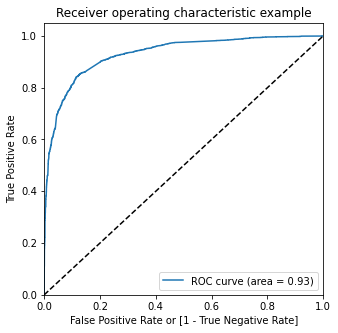

In [1320]:
draw_roc(prediction_table.y_train, prediction_table.prob)

### Step 10: Finding Optimal Cutoff Point

In [1321]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    prediction_table[i]= prediction_table.prob.map(lambda x: 1 if x > i else 0)
prediction_table.head()

,y_train,prob,predection,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.005810,0,1,0,0,0,0,0,0,0,0,0
6795,0,0.282817,0,1,1,1,0,0,0,0,0,0,0
3516,0,0.008167,0,1,0,0,0,0,0,0,0,0,0
8105,0,0.140040,0,1,1,0,0,0,0,0,0,0,0
3934,0,0.063551,0,1,0,0,0,0,0,0,0,0,0


In [1322]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(prediction_table.y_train, prediction_table[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.720625  0.965937  0.569465
0.2   0.2  0.804576  0.926602  0.729385
0.3   0.3  0.859771  0.858475  0.860570
0.4   0.4  0.867347  0.833739  0.888056
0.5   0.5  0.864564  0.793187  0.908546
0.6   0.6  0.861936  0.740876  0.936532
0.7   0.7  0.838899  0.636253  0.963768
0.8   0.8  0.821583  0.568532  0.977511
0.9   0.9  0.779375  0.436740  0.990505


<Figure size 720x576 with 0 Axes>

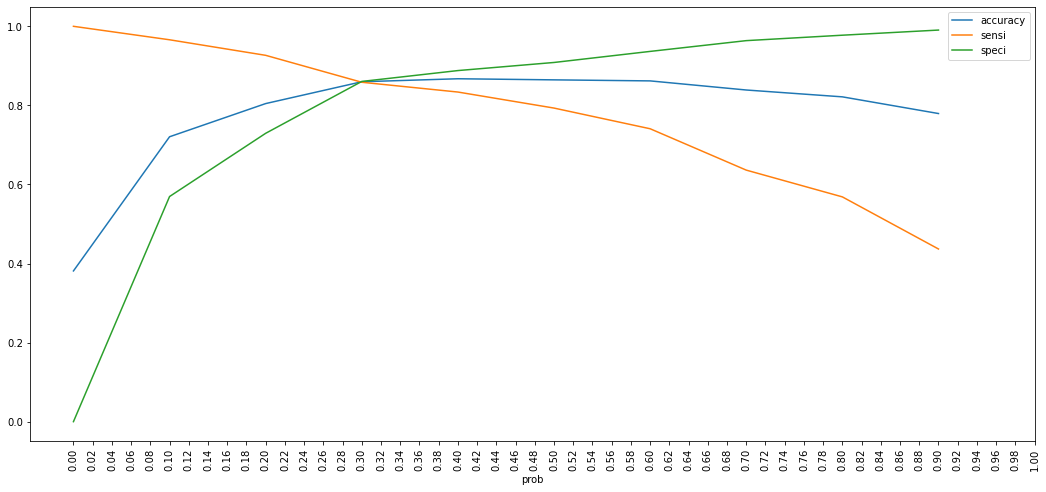

In [1323]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=[10,8])
# sns.lineplot(data=cutoff_df, x='prob', y=['accuracy','sensi','speci'])
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize = (18,8))
plt.xticks(np.arange(0.0,1.02, 0.02), rotation=90)
plt.show()

In [1324]:
# looks like converges at 0.3 (optimal point)

prediction_table["final_predection"] = prediction_table.prob.map(lambda x : 1 if x > 0.3 else 0)
prediction_table

,y_train,prob,predection,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predection
1871,0,0.005810,0,1,0,0,0,0,0,0,0,0,0,0
6795,0,0.282817,0,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.008167,0,1,0,0,0,0,0,0,0,0,0,0
8105,0,0.140040,0,1,1,0,0,0,0,0,0,0,0,0
3934,0,0.063551,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1,0.871526,1,1,1,1,1,1,1,1,1,1,0,1
79,1,0.988259,1,1,1,1,1,1,1,1,1,1,1,1
8039,1,0.277727,0,1,1,1,0,0,0,0,0,0,0,0
6936,0,0.038072,0,1,0,0,0,0,0,0,0,0,0,0


In [1325]:
metrics.accuracy_score(prediction_table.y_train, prediction_table.final_predection)

0.8597711811997526

In [1326]:
confusion = metrics.confusion_matrix(prediction_table.y_train, prediction_table.final_predection)
confusion

array([[3444,  558],
       [ 349, 2117]])

In [1327]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1328]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8584752635847527

In [1329]:
# Let us calculate specificity
TN / float(TN+FP)

0.8605697151424287

In [1330]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.13943028485757122


In [1331]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7914018691588786


In [1332]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9079883996836278


In [1333]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7914018691588786

In [1334]:
#recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8584752635847527

### Precision and Recall trade off

In [1335]:
from sklearn.metrics import precision_recall_curve

In [1336]:
p, r, thresholds = precision_recall_curve(prediction_table.y_train, prediction_table.prob)

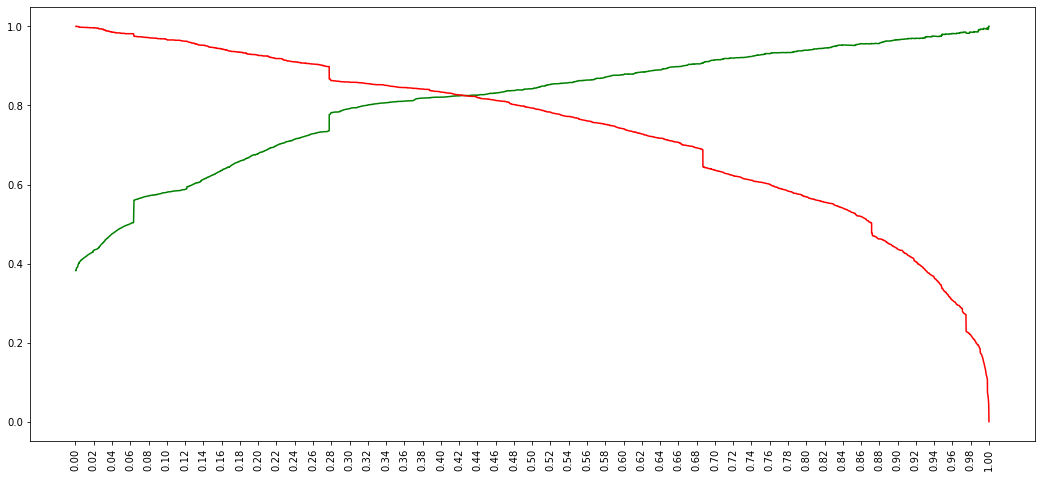

In [1337]:
plt.figure(figsize=[18,8])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0.0,1.02, 0.02), rotation=90)
plt.show()

In [1338]:
prediction_table["final_predection_Precision"] = prediction_table.prob.map(lambda x : 1 if x > 0.42 else 0)
prediction_table

,y_train,prob,predection,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predection,final_predection_Precision
1871,0,0.005810,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.282817,0,1,1,1,0,0,0,0,0,0,0,0,0
3516,0,0.008167,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.140040,0,1,1,0,0,0,0,0,0,0,0,0,0
3934,0,0.063551,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1,0.871526,1,1,1,1,1,1,1,1,1,1,0,1,1
79,1,0.988259,1,1,1,1,1,1,1,1,1,1,1,1,1
8039,1,0.277727,0,1,1,1,0,0,0,0,0,0,0,0,0
6936,0,0.038072,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1339]:
metrics.accuracy_score(prediction_table.y_train, prediction_table.final_predection_Precision)

0.866573902288188

In [1340]:
confusion = metrics.confusion_matrix(prediction_table.y_train, prediction_table.final_predection_Precision)
confusion

array([[3567,  435],
       [ 428, 2038]])

In [1341]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('sensitivity',TP / float(TP+FN))


# Let us calculate specificity
print('specificity', TN / float(TN+FP))

# Calculate false postive rate 
print('false postive rate' ,FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive value ',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive value',TN / float(TN+ FN))

# Precision
print('Precision',confusion[1,1]/(confusion[0,1]+confusion[1,1]))

#recall
print('recall',confusion[1,1]/(confusion[1,0]+confusion[1,1]))

sensitivity 0.8264395782643957
specificity 0.8913043478260869
false postive rate 0.10869565217391304
Positive predictive value  0.8241002830570158
Negative predictive value 0.8928660826032541
Precision 0.8241002830570158
recall 0.8264395782643957


### Testing the model on test data

In [1342]:
x_test[minMax_cols] = scaler.transform(x_test[minMax_cols])

In [1343]:
y_test_predict = final_log_model.predict(sm.add_constant(x_test[cols]))

In [1344]:
test_DF = pd.DataFrame({"y_test":y_test, "prop":y_test_predict})
test_DF.head()

,y_test,prop
4269,1,0.880062
2376,1,0.974802
7766,1,0.717030
9199,0,0.063551
4359,1,0.871526


In [1345]:
test_DF['final_pred'] = test_DF.prop.map(lambda x: 1 if x > 0.42 else 0)
test_DF

,y_test,prop,final_pred
4269,1,0.880062,1
2376,1,0.974802,1
7766,1,0.717030,1
9199,0,0.063551,0
4359,1,0.871526,1
...,...,...,...
8649,0,0.113179,0
2152,1,0.974802,1
7101,0,0.277727,0
5331,0,0.165912,0


In [1346]:
metrics.accuracy_score(test_DF.y_test, test_DF.final_pred)

0.8676046176046176

In [1347]:
confusion_test = metrics.confusion_matrix(test_DF.y_test, test_DF.final_pred)
confusion_test

array([[1491,  186],
       [ 181,  914]])

In [1348]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('sensitivity',TP / float(TP+FN))


# Let us calculate specificity
print('specificity', TN / float(TN+FP))

# Calculate false postive rate 
print('false postive rate' ,FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive value ',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive value',TN / float(TN+ FN))

# Precision
print('Precision',confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1]))

#recall
print('recall',confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1]))

sensitivity 0.8347031963470319
specificity 0.889087656529517
false postive rate 0.11091234347048301
Positive predictive value  0.8309090909090909
Negative predictive value 0.8917464114832536
Precision 0.8309090909090909
recall 0.8347031963470319
